# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования:**
- Изучить, как быстро продавались квартиры;
- Установить, какие факторы больше всего влияют на общую (полную) стоимость объекта;
- Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра;
- Описать, как стоимость объектов в Санкт-Петербурге зависит от расстояния до центра города.

**Описание данных**\
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)\
`balcony` — число балконов\
`ceiling_height` — высота потолков (м)\
`cityCenters_nearest` — расстояние до центра города (м)\
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)\
`first_day_exposition` — дата публикации\
`floor` — этаж\
`floors_total` — всего этажей в доме\
`is_apartment` — апартаменты (булев тип)\
`kitchen_area` — площадь кухни в квадратных метрах (м²)\
`last_price` — цена на момент снятия с публикации\
`living_area` — жилая площадь в квадратных метрах (м²)\
`locality_name` — название населённого пункта\
`open_plan` — свободная планировка (булев тип)\
`parks_around3000` — число парков в радиусе 3 км\
`parks_nearest` — расстояние до ближайшего парка (м)\
`ponds_around3000` — число водоёмов в радиусе 3 км\
`ponds_nearest` — расстояние до ближайшего водоёма (м)\
`rooms` — число комнат\
`studio` — квартира-студия (булев тип)\
`total_area` — общая площадь квартиры в квадратных метрах (м²)\
`total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # Разделитель табуляция

В исследуемом датафрейме 22 колонки для удобства просмотра расширим максимальное количество отображаемых колонок, с учетом тех которые предстоит добавить

In [2]:
pd.set_option('display.max_columns', 32) 

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Построим общую гистограмму для всех столбцов таблицы

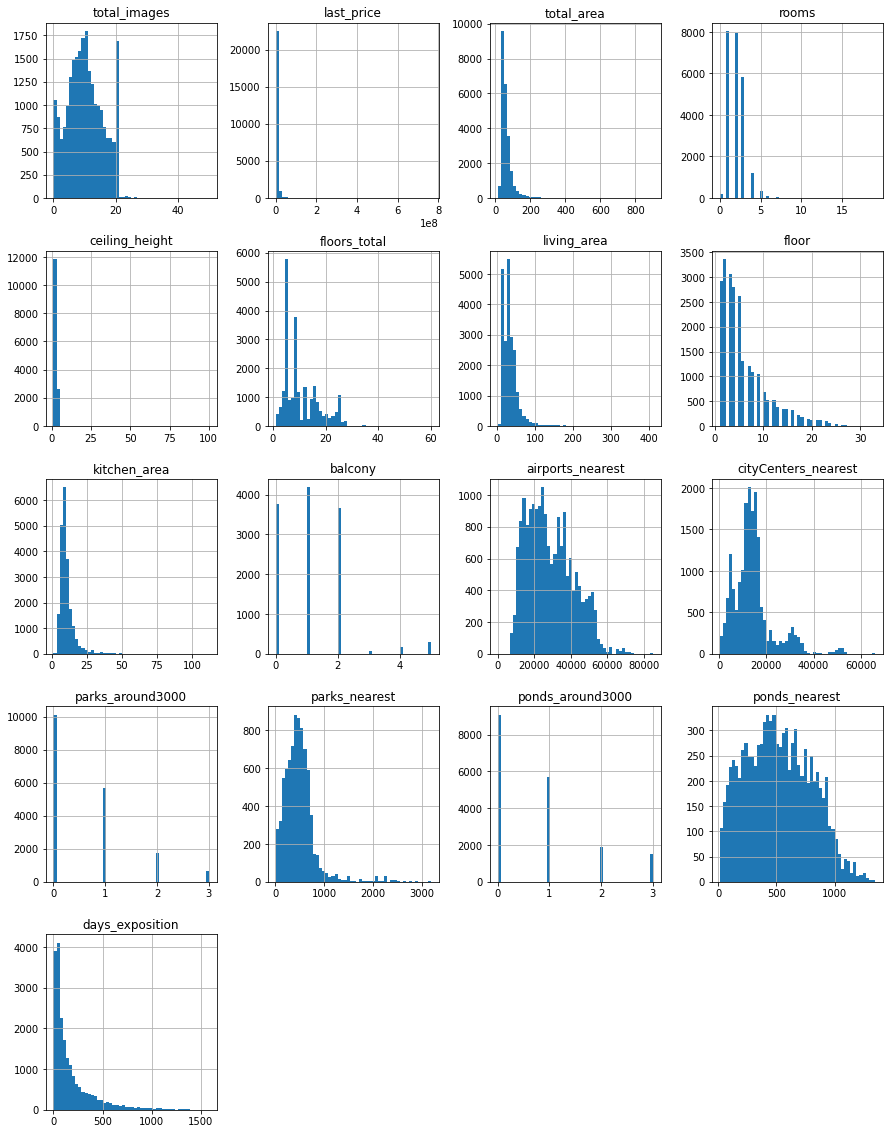

In [4]:
data.hist(figsize=(15, 20), bins=50);

Проверим на полные дубликаты

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data.duplicated().sum()

0

Полные дубликаты не обнаружены, но это не означает что нет объектов которые выставлялись несколько раз из-за обнаруженных ошибок, в объявлениях могла корректироваться какая либо информация об объекте и выставляться повторно. 
Возможное решение добавить какой либо id(например id аккаунта с которого подается объявление) для поиска повторов.

Посмотрим общую информацию о таблице

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Проверим за какой период предоставлены данные:

In [8]:
data['first_day_exposition'].min()

'2014-11-27T00:00:00'

In [9]:
data['first_day_exposition'].max()

'2019-05-03T00:00:00'

**Вывод:**\
Датафрейм содержит информацию о 23699 объявлениях, на каждое объявление приходится 22 характерстики.\
Данные представлены с 27 ноября 2014 по 03 мая 2019.

После предварительного ознакомления с данными можно сказать следущее:
- дата подачи объявления, в столбце `first_day_exposition`, указана с часами и минутами вместо которых нули;
- общее количество этажей в здании `floors_total` указано не целым числом;
- столбец `is_apartment` булевого типа содержит пропуски;
- в столбце `balcony` есть пропуски и нулевые значения, указан не целым числом;
- название населенного пункта в `locality_name` часть указано с типом населенного пункта часть без, что создаст проблемы при сортировке и обработке, возможно с этим связано отсутствие части геоданных второй части таблицы;
- столбцы с количеством парков и прудов в радиусе 3км `parks_around3000` и `ponds_around3000` не целочисленные и содержат пропуски;
- столбцы с расстояние до ближайшего парка и и пруда `parks_nearest` и `ponds_nearest` большое количество пропусков;
- количество дней от публикации до снятия `days_exposition` указано не целым числом

Похоже что те столбцы значения которых должны быть целыми, представлены в дробном формате, из-за того что имеют NaN в своем столбце, возможно преобразование произошло на этапе выгрузки данных автоматически.

### Предобработка данных

Изучим распределение пропусков по столбцам

In [10]:
data.isna().sum() # Количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
data.isna().mean() # Доля от количества указанных значений

display(pd.DataFrame(round((data.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,38.80
floors_total,0.36
living_area,8.03
floor,0.00
is_apartment,88.29


Разберем каждый столбец в отдельности

#### ceiling_height

In [12]:
data['ceiling_height'].isna().mean()

0.38799105447487237

`ceiling_height` - в 38,8% объявлений не указана высота помещения. 

Один из вариантов почему не указана высота - пользователь считает, что она имеет ожидаемое значение, и не представляет особой ценности.

Если предположить что в одном населенном пункте с большей вероятностью будут находиться дома одной серии застройки, то для большей точности можно заменить медианой по населенному пункту, а для Санкт-Петербурга воспользоваться столбцом удаление от центра в км.

Но учитывая количество пропусков, замена может повлиять на качество полученных результатов.

In [13]:
data['ceiling_height'].value_counts().head(20) # Топ высот по частоте

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
2.55     980
2.75     910
2.65     676
3.20     277
3.10     203
2.90     164
3.30     141
2.56     139
3.50     130
2.57     103
2.85     101
3.40      92
2.54      83
2.64      81
2.52      79
Name: ceiling_height, dtype: int64

В большинстве объявлений высоты потолков вполне ожидаемые

In [14]:
data['ceiling_height'].value_counts().tail(20)

3.58     1
4.30     1
26.00    1
2.49     1
3.84     1
2.89     1
5.20     1
4.90     1
3.76     1
22.60    1
14.00    1
2.25     1
3.88     1
24.00    1
8.30     1
4.25     1
3.39     1
3.93     1
10.30    1
4.65     1
Name: ceiling_height, dtype: int64

В "хвосте" сортировки по популярности, встречаются странные значения с неправдоподобной высотой, а также те объявления где пользователи указывают высоту с точностью до сантиметра

Посмотрим на все уникальные значения высот

In [15]:
data['ceiling_height'].sort_values().unique() 

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Значения высот выше 10,3м похожи на ошибку при вводе данных. Например значение 22,6м больше похоже на 2,26м.\
Но могут быть бывшей коммерческой недвижимостью выставочными залами и т.д.

Рассмотрим их подробнее

In [16]:
data.loc[data['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,False,False,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Также посмотрим на значения меньше 2,1м

In [17]:
data.loc[data['ceiling_height'] < 2.1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,NaN,False,False,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,NaN,False,False,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,NaN,False,False,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,False,False,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.2,12,NaN,False,False,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.9,2,NaN,False,False,12.00,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.0,5,False,False,False,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.0,1,NaN,False,False,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0


Значения меньше 2,1м, могут быть чердаками или подвалами с низкой высотой этажа, но этажи часто указаны не первым и не последним, заменим их на медианное значение, так как даже для зданий застройкии 80-х годов минмальная высота помещений согласно СНиП II-Л.1-62 допускалась не менее 2.1 м также как и современный СНиП 31-01-2003 Здания жилые многоквартирные.

In [18]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>10 else x)

In [19]:
data.loc[data['ceiling_height'] < 2.2,'ceiling_height'] = data['ceiling_height'].median()

In [20]:
data['ceiling_height'].sort_values().unique() #Проверка

array([ 2.2 ,  2.25,  2.26,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,
        2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,
        2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,
        2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,
        2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,
        2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,
        2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,
        3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,
        3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,
        3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.29,
        3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,
        3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,
        3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,
        3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,  3.68,
        3.69,  3.7 ,

In [21]:
data.ceiling_height.describe()

count    14504.000000
mean         2.729111
std          0.297871
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

#### floors_total

In [22]:
data['floors_total'].isna().mean()

0.0036288450989493226

In [23]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [24]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

`floors_total` - незначительное количество пропусков, не повлияет на цель исследования, возможная причина сложное архитектурное исполнение здания или здание переменной этажности, где пользователю трудно установить точное количество этажей


Странными выглядят значения 52 и 60 этажей.

In [25]:
data.loc[data['floors_total'] >= 52]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


По данным Wikipedia в Санкт-Петербурге нет зданий с таким количеством этажей заменим на близжайшее по популярности и большее чем floor

Лахта-центр	88 эт.
Лидер Тауэр	42 эт.
https://ru.wikipedia.org/wiki/Список_самых_высоких_зданий_Санкт-Петербурга

В Кронштадте сохраняется исторический облик города и большинство зданий высотой в 5 этажей, максимум 15

In [26]:
data.query('floors_total > 15 and locality_name == "Кронштадт"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
10189,16,4450000.0,62.5,2018-02-11T00:00:00,2,2.51,20.0,NaN,16,NaN,False,False,NaN,NaN,Кронштадт,68042.0,49767.0,3.0,526.0,2.0,352.0,45.0


Заменим на ближайшее по популярности но меньшее чем этаж объявления, чтобы не увеличивать количество квартир на последних этажах

In [27]:
data.loc[10189,'floor'] = 15

data.loc[data['floors_total'] >= 52, 'floors_total'] = \
data.loc[data['floors_total'] >= data['floor'], 'floors_total'].mode()

data.loc[(data['floors_total'] >= 15) & (data['locality_name'] == "Кронштадт"), 'floors_total'] = \
data.loc[data['floors_total'] >= data['floor'], 'floors_total'].mode()

In [28]:
data.loc[data['floors_total']>=52] # Проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [29]:
data.query('floors_total > 15 and locality_name == "Кронштадт"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### living_area

In [30]:
data['living_area'].isna().mean()

0.08029874678256467

In [31]:
data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


`living_area` - 8% пропусков, можно заполнить отношения общей площади к имеющимся значениям жилой площади, но нужно учесть еще площадь кухни, балкона и других помещений. 

Еще судя по всему в датасете недвижимость разных типов, года постройки, и таким образом соотношение может меняться в широком диапазоне. Оставим без изменений.

#### kitchen_area

In [32]:
data[data['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


In [33]:
data['kitchen_area'].isna().mean()

0.09612219924891345

`kitchen_area` - почти 10% пропусков, как и в случае с жилой площадью, по всей видимости, не все заполняют эти данные

#### is_apartment

In [34]:
data[data['is_apartment'] == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3.0,29.4,1,True,False,False,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3.0,40.0,3,True,False,False,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,NaN,6.0,58.3,5,True,False,False,20.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,False,False,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,False,False,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [35]:
data['is_apartment'].isna().mean()

0.8829064517490189

`is_apartment` - 88,3% пропусков, но так данные в столбце заявлены как bool, преположим что NaN = False, и пользователь просто не указал это.\
Судя по статье https://realty.yandex.ru/journal/post/chto-takoe-apartamenty/ аппартаментов 10-15% на рынке недвижимости. Наш результат входит в диапазон

In [36]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [37]:
data['is_apartment'].isna().mean() # Проверка

0.0

#### balcony

In [38]:
data['balcony'].isna().mean()

0.4860542638929913

`balcony` - 48,6% пропусков, также предположим что отсутствие значения = отсутствию балкона. Заменим на 0 и изменим тип на int.

In [39]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [40]:
data['balcony'].unique() # Проверка

array([0, 2, 1, 5, 4, 3])

In [41]:
data['balcony'].isna().mean() # Проверка

0.0

#### locality_name

In [42]:
data[data['locality_name'].isnull()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,False,False,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,False,False,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,False,False,False,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,False,False,False,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,False,False,False,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,False,False,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,False,False,False,NaN,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,False,False,False,NaN,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [43]:
data['locality_name'].isna().mean()

0.002067597788936242

`locality_name` - 0,2% пропусков, такую ошибку стоит показать разработчикам, так как географические данные, в болшинстве случаев, для NaN посчитаны.\
Некоторые значние можно было бы восстановить по комбинации геоданных, но Санкт-Петербург присвоит практически все значения, и для целей нашего исследования не критично

In [44]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Обнаружены следующие ошибки и повторы:
- деревня Гарболово, поселок Гарболово
- посёлок и поселок,
- посёлок городского типа Павлово и городской посёлок Павлово
- поселок станции Вещево и посёлок при железнодорожной станции Вещево
и т.д.

Тип населенного пункта важная характеристика для оценки недвижимости, которая характеризует количество тех или иных "удобств" находящихся в близжайшей доступности, а также примерную численность населения.

Но вблизи такого крупного города как Санкт-Петербург границы населенных пунктов стираются, превращаясь в единую агломерацию. 

Для дальнейшего удобства создадим столбец `clean_locality_name` содержащий только название, без типа населенного пункта.

Конечно вполне возможно, что встречаются деревни и поселки с одинаковым названием. Что можно было бы проверить по геоданным населенных пунктов с одинаковым названием. Но неизвестно как происходило их присовение. После уточнения у разработчиков вполне можно было бы попробывать. Также возможно за период который представлен в датасете некоторые населенные пункты изменили свой типа.

Заменим пропуски на 'Unknown' для дальнейшей обработки

In [45]:
data['locality_name'] = data['locality_name'].fillna('Unknown')

Воспользуемся паттерном: название населенного пункта с большой буквы

In [46]:
def clean_location(location):
    clean=''
    for i in range(len(location)):
        if location[i].isupper():
            clean=location[i:]
            break
    return clean

In [47]:
data['clean_locality_name'] = data['locality_name'].apply(clean_location)

In [48]:
data['clean_locality_name'].sort_values().unique()

array(['Unknown', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород

In [49]:
data.head() # Проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


#### days_exposition

In [50]:
data['days_exposition'].isna().mean()

0.13422507278788134

In [51]:
data[data['days_exposition'].isnull()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,False,False,False,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,Санкт-Петербург
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,False,False,False,7.0,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,False,False,False,8.3,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,False,False,False,6.0,0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN,Санкт-Петербург
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,False,False,False,11.0,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,Санкт-Петербург
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,False,False,False,6.2,0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN,Санкт-Петербург
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,False,False,False,NaN,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Санкт-Петербург
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,False,False,False,5.2,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Кировск


13% пропусков, скорее всего данные объявления на дату выгрузки еще не были сняты

#### first_day_exposition

Переведем дату время в удобный формат для обработки

In [52]:
# Время подачи объявления отсутствует
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],	format='%Y-%m-%dT%H:%M:%S')

#### остальные столбцы

Следующие столбцы имеют похожее количество пропусков 
- `airports_nearest` 0.233850, 
- `cityCenters_nearest` 0.232879, 
- `parks_around3000` 0.232837,
- `ponds_around3000` 0.232837,

Похоже что пропуски получились, возможно из-за не корректного названия населенного пункта. Необходимо уточнить у разработчика как происходило присвоение

В столбцах:
- `ponds_nearest` - 0.615596
- `parks_nearest` - 0.659100

количество пропусков выше, можно преположить что разница могла появитсья следующим образом, если в столбце `parks_around3000` указан "0" а встолбце `parks_nearest` указано NaN значит парков в радиусе 3км нет, обработаем необходимые столбцы далее.

Учитывая задачи исследования, аномалии в столбцах `last_price`, `total_area`, `rooms`, `days_exposition` могут повлиять на качество результатов исследования, проверим на их наличие

#### last_price

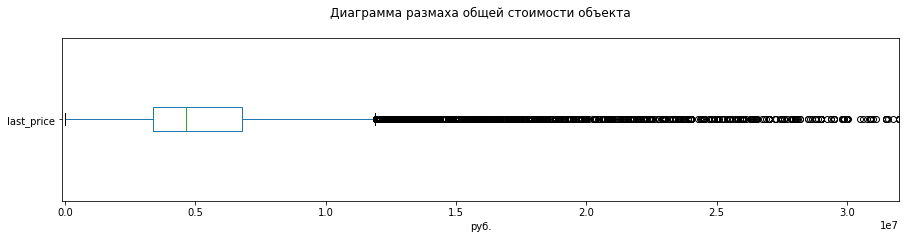

In [53]:
data['last_price'].plot(kind='box', figsize=(15,3), vert=False, xlim=(-100000,32000000))
plt.title("Диаграмма размаха общей стоимости объекта\n")
plt.xlabel("руб.");

In [54]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Чаще всего цена от 3,4млн. до 6,8млн. Проверим минимальные значения по стоимости

In [55]:
data.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
5698,7,450000.0,42.0,2017-07-31,2,NaN,1.0,23.0,1,False,False,False,5.8,0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0,Будогощь
6859,6,490000.0,40.0,2017-12-11,1,NaN,5.0,NaN,3,False,False,False,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0,Старополье
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург
9581,7,450000.0,43.4,2018-08-31,2,NaN,5.0,30.3,3,False,False,False,5.5,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0,Старополье
10782,3,490000.0,29.1,2016-05-05,1,2.50,5.0,17.0,5,False,False,False,5.5,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0,Сланцы
14911,5,430000.0,54.0,2018-06-26,2,NaN,3.0,NaN,3,False,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Свирь
16032,8,480000.0,32.0,2019-01-06,1,NaN,2.0,16.0,1,False,False,False,NaN,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0,Сланцы
16219,14,450000.0,38.5,2018-07-11,2,2.65,2.0,NaN,1,False,False,False,NaN,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Вахнова Кара
16274,18,440000.0,40.0,2018-07-10,1,NaN,5.0,NaN,1,False,False,False,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Старополье
17456,7,430000.0,30.4,2019-04-22,1,NaN,2.0,16.0,1,False,False,False,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сланцы


Все значения кажуться вполне нормальными, кроме одного - цена всего 12190 за 109м2 в Санкт-Петербурге, в 9 км от центра города.
Проверим сколько стоит похожая недвижимость

In [56]:
data.query('(100 < total_area < 120) and (8000 < cityCenters_nearest < 10000)')['last_price'].median()

13250000.0

Похоже на ошибку ввода данных пользователь указал цену в тысячах.

In [57]:
data.loc[data['last_price'] < 50000, 'last_price'] = data.loc[(data['last_price'] < 50000), 'last_price'] * 1000

In [58]:
data.loc[8793,'last_price'] # Проверка

12190000.0

Проверим максимальные значения. По диаграмме размаха у нас недвижимость дороже 12 000 000 считается выбросами

In [59]:
data.query('last_price > 12000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
19,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,Санкт-Петербург
35,6,15500000.0,149.0,2017-06-26,5,NaN,5.0,104.0,4,False,False,False,17.0,0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0,Санкт-Петербург
42,13,22000000.0,161.8,2015-07-08,4,2.80,4.0,80.9,2,False,False,False,17.6,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,Петергоф
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23587,7,12100000.0,88.0,2017-07-07,3,NaN,10.0,NaN,5,False,False,False,14.0,0,Санкт-Петербург,37412.0,8370.0,1.0,392.0,2.0,359.0,200.0,Санкт-Петербург
23590,0,21187872.0,123.3,2017-04-25,3,NaN,NaN,50.4,18,False,False,False,23.6,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,Санкт-Петербург
23608,22,14000000.0,80.0,2017-11-10,3,NaN,11.0,44.1,6,False,False,False,11.0,2,Санкт-Петербург,11943.0,11710.0,1.0,518.0,1.0,232.0,19.0,Санкт-Петербург
23631,17,14799000.0,104.0,2018-11-18,3,3.10,4.0,66.0,2,False,False,False,14.0,1,Санкт-Петербург,39047.0,13944.0,0.0,NaN,1.0,553.0,90.0,Санкт-Петербург


1942 строки. Учитывая то, что в датасете есть столбцы, в которых болшое число пропусков, удаляя данные можем сильно повлиять на  эти столбцы потеряв важные закономерности. Удалять будем только совсем экстермальные значения. Например квартиры стоимость которых превышает 30 000 000

In [60]:
data.query('last_price > 30000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
51,7,45000000.0,161.0,2017-10-17,3,3.20,8.0,38.00,4,False,False,False,50.0,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0,Санкт-Петербург
121,20,33000000.0,180.0,2017-02-17,3,2.90,9.0,86.00,8,False,False,False,24.0,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,Санкт-Петербург
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.00,3,False,False,False,NaN,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,Санкт-Петербург
262,14,37500000.0,158.0,2019-01-24,4,NaN,12.0,88.00,4,False,False,False,40.0,0,Санкт-Петербург,25799.0,4593.0,0.0,NaN,2.0,840.0,NaN,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4.0,181.80,2,False,False,False,21.9,0,Санкт-Петербург,20630.0,1229.0,3.0,189.0,3.0,40.0,42.0,Санкт-Петербург
23091,20,33000000.0,186.0,2017-10-11,3,3.00,5.0,130.00,3,False,False,False,16.0,1,Санкт-Петербург,24785.0,3359.0,0.0,NaN,0.0,NaN,138.0,Санкт-Петербург
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4.0,82.40,4,False,False,False,40.1,0,Санкт-Петербург,37268.0,15419.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
23395,4,40000000.0,188.0,2017-05-29,6,NaN,6.0,109.51,4,False,False,False,31.3,0,Санкт-Петербург,23390.0,2254.0,2.0,425.0,1.0,62.0,30.0,Санкт-Петербург


In [61]:
data = data[data['last_price'] < 30000000]
data.query('last_price > 30000000') # Проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name


#### total_area

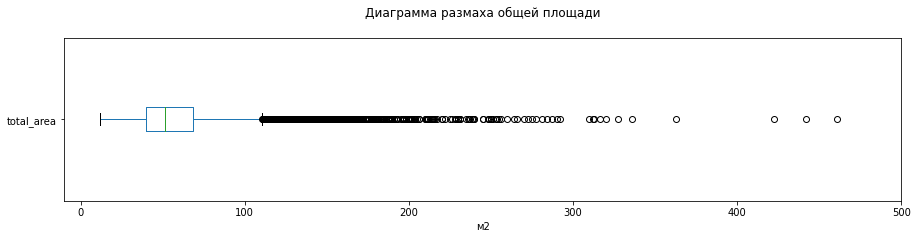

In [62]:
data['total_area'].plot(kind='box', figsize=(15,3), vert=False, xlim=(-10,500))
plt.title("Диаграмма размаха общей площади\n")
plt.xlabel("м2");

In [63]:
data['total_area'].describe()

count    23373.000000
mean        58.222268
std         28.088829
min         12.000000
25%         40.000000
50%         51.500000
75%         68.300000
max        460.800000
Name: total_area, dtype: float64

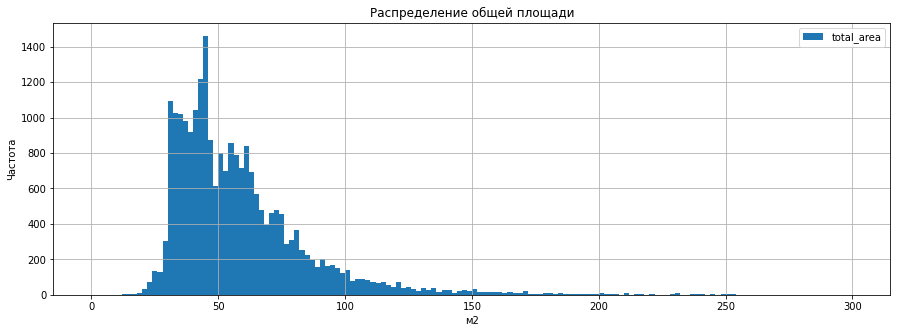

In [64]:
data.plot(y='total_area', kind='hist', bins=150, grid=True, figsize=(15,5), range=(0,300))
plt.title("Распределение общей площади")
plt.xlabel("м2")
plt.ylabel("Частота");

До ~20м2 редкие одиночные значения, как и после ~250м2

In [65]:
data.query('total_area < 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,False,True,False,NaN,0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,Шушары
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5.0,9.00,2,False,False,False,NaN,0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0,Санкт-Петербург
5855,3,945750.0,19.50,2017-09-18,0,2.76,3.0,12.70,2,False,True,False,NaN,0,поселок городского типа Дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Дубровка
6084,6,770000.0,18.00,2017-10-16,1,NaN,5.0,13.00,4,False,False,False,3.0,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Тихвин
8454,7,2250000.0,19.00,2019-03-12,0,3.00,6.0,NaN,2,False,True,False,NaN,0,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0,Санкт-Петербург
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3.0,14.00,3,False,False,False,2.4,0,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0,Пушкин
8755,1,1350000.0,18.80,2017-11-22,0,2.75,19.0,15.80,1,False,True,False,NaN,0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0,Санкт-Петербург
8886,10,2450000.0,15.50,2018-08-22,0,NaN,5.0,10.00,2,False,True,False,NaN,0,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0,Санкт-Петербург
9157,0,3400000.0,17.60,2018-03-18,1,NaN,5.0,15.00,2,False,False,False,NaN,0,Санкт-Петербург,21555.0,1967.0,2.0,336.0,1.0,309.0,117.0,Санкт-Петербург
9412,5,2100000.0,16.00,2017-12-10,0,NaN,6.0,13.00,1,False,False,True,NaN,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,Санкт-Петербург


In [66]:
data.query('total_area > 250')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
866,5,25000000.0,363.00,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.60,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,Санкт-Петербург
2489,9,12500000.0,255.00,2017-04-21,3,NaN,2.0,153.9,2,False,False,False,100.70,0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0,Санкт-Петербург
3267,1,25092624.0,266.20,2015-12-08,5,3.00,3.0,155.1,1,False,False,False,11.60,0,Санкт-Петербург,32106.0,5065.0,0.0,NaN,2.0,471.0,660.0,Санкт-Петербург
3676,12,28789000.0,441.98,2019-01-23,4,NaN,6.0,NaN,6,False,False,False,35.05,0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
4149,6,23000000.0,272.60,2018-01-11,10,3.14,7.0,145.9,7,False,False,False,18.80,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN,Санкт-Петербург
4199,8,24900000.0,281.10,2018-02-21,6,3.30,5.0,193.5,3,False,False,False,26.60,0,Санкт-Петербург,21480.0,2453.0,3.0,75.0,1.0,795.0,126.0,Санкт-Петербург
4536,25,26000000.0,290.00,2017-11-16,5,2.80,17.0,141.0,16,False,False,False,45.00,0,Санкт-Петербург,30094.0,5608.0,0.0,NaN,1.0,153.0,120.0,Санкт-Петербург
4823,20,29000000.0,253.00,2017-12-27,7,3.50,5.0,180.0,5,False,False,False,23.30,1,Санкт-Петербург,24253.0,4821.0,1.0,694.0,1.0,650.0,NaN,Санкт-Петербург
9397,10,16073000.0,263.80,2019-01-30,3,NaN,19.0,NaN,4,False,False,False,23.42,0,Санкт-Петербург,18805.0,4400.0,0.0,NaN,0.0,NaN,35.0,Санкт-Петербург
9550,10,23500000.0,313.00,2017-02-13,9,3.20,6.0,179.2,5,False,False,False,13.20,0,Санкт-Петербург,38435.0,10138.0,1.0,146.0,0.0,NaN,NaN,Санкт-Петербург


Значения меньше 20 м2 и больше 250м2 сложно считать стандартной недвижимостью. А учитывая количество таких объявлений за 4,5 года предоставленных данных, можно их отбросить.

In [67]:
data = data.loc[(data['total_area'] < 250) & (data['total_area'] > 20)]
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.4,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,Санкт-Петербург
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Тосно
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Рождествено
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Санкт-Петербург


#### rooms

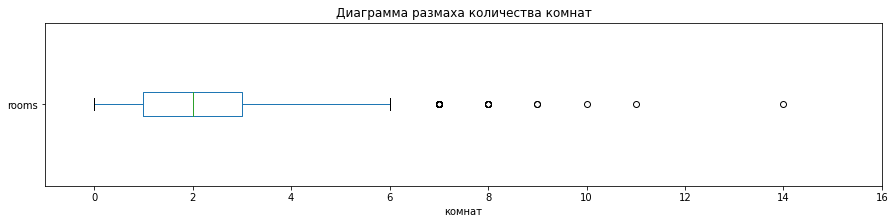

In [68]:
data['rooms'].plot(kind='box', figsize=(15,3), vert=False, xlim=(-1,16))
plt.title("Диаграмма размаха количества комнат")
plt.xlabel("Количество комнат");

In [69]:
data['rooms'].describe()

count    23306.000000
mean         2.035270
std          1.008758
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

Квартиры с 0 комнат это скорее всего квартиры студии и квартиры с открытой планировкой, а вот значение в 14 комнат, стоит на диаграмме отдельно от основной плотности, отбросим его

In [70]:
data.query('rooms > 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
20829,6,28659000.0,245.4,2016-03-31,14,NaN,4.0,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,Санкт-Петербург


In [71]:
data = data.loc[data['rooms'] < 12]

In [72]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23305 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23305 non-null  int64         
 1   last_price            23305 non-null  float64       
 2   total_area            23305 non-null  float64       
 3   first_day_exposition  23305 non-null  datetime64[ns]
 4   rooms                 23305 non-null  int64         
 5   ceiling_height        14250 non-null  float64       
 6   floors_total          23216 non-null  float64       
 7   living_area           21453 non-null  float64       
 8   floor                 23305 non-null  int64         
 9   is_apartment          23305 non-null  bool          
 10  studio                23305 non-null  bool          
 11  open_plan             23305 non-null  bool          
 12  kitchen_area          21091 non-null  float64       
 13  balcony         

#### days_exposition

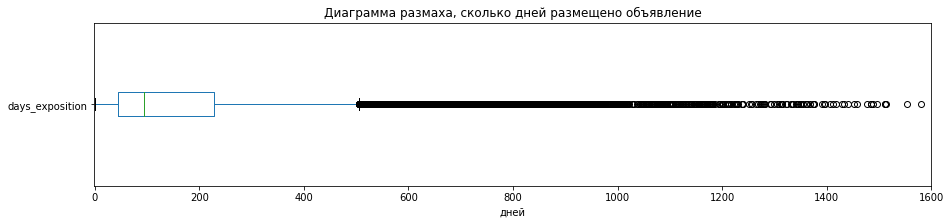

In [74]:
data['days_exposition'].plot(kind='box', figsize=(15,3), vert=False, xlim=(-1,1600))
plt.title("Диаграмма размаха, сколько дней размещено объявление")
plt.xlabel("Количество дней");

In [75]:
data['days_exposition'].describe()

count    20212.000000
mean       179.457204
std        218.017854
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [76]:
data.query('days_exposition < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
1632,19,4000000.0,49.9,2019-05-01,2,2.5,9.0,25.0,1,False,False,False,10.0,0,Санкт-Петербург,13567.0,14384.0,1.0,20.0,1.0,681.0,1.0,Санкт-Петербург
13061,20,6100000.0,51.4,2019-04-29,2,3.0,5.0,31.7,4,False,False,False,6.9,1,Санкт-Петербург,10776.0,9389.0,0.0,NaN,0.0,NaN,2.0,Санкт-Петербург
16053,4,4070000.0,45.1,2019-04-30,2,NaN,5.0,22.7,3,False,False,False,6.6,0,Санкт-Петербург,40859.0,11668.0,2.0,485.0,0.0,NaN,2.0,Санкт-Петербург
16212,0,7806000.0,25.0,2019-04-30,1,3.0,5.0,NaN,5,False,False,False,NaN,0,Санкт-Петербург,36525.0,10302.0,0.0,NaN,0.0,NaN,2.0,Санкт-Петербург


In [77]:
data.query('days_exposition > 1460')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
1885,2,13300000.0,79.60,2014-12-09,2,3.00,8.0,42.70,7,False,False,False,18.00,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513.0,Санкт-Петербург
4736,11,6650000.0,68.30,2015-02-19,4,2.63,5.0,45.10,4,False,False,False,9.00,0,Санкт-Петербург,20182.0,1724.0,3.0,606.0,3.0,453.0,1477.0,Санкт-Петербург
6691,3,4400000.0,42.98,2014-12-12,1,NaN,5.0,18.72,1,False,False,False,11.31,0,Пушкин,19715.0,30358.0,1.0,439.0,3.0,232.0,1512.0,Пушкин
9553,11,10600000.0,80.00,2014-12-09,3,2.85,17.0,44.00,9,False,False,False,15.00,0,Санкт-Петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553.0,Санкт-Петербург
11955,4,11400000.0,76.00,2014-12-09,2,NaN,9.0,36.00,3,False,False,False,14.00,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1484.0,Санкт-Петербург
14093,7,9500000.0,100.00,2015-02-19,4,3.00,5.0,76.00,5,False,False,False,10.00,0,Санкт-Петербург,25950.0,4798.0,1.0,690.0,0.0,NaN,1497.0,Санкт-Петербург
15313,1,9278000.0,139.80,2014-12-28,4,2.80,5.0,NaN,4,False,False,False,NaN,0,Сестрорецк,54416.0,35515.0,0.0,NaN,0.0,NaN,1489.0,Сестрорецк
18843,11,3500000.0,48.20,2014-12-15,2,2.50,5.0,27.40,2,False,False,False,7.70,3,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.0,Новое Девяткино
19123,9,5990000.0,82.00,2015-02-19,3,3.00,4.0,60.00,2,False,False,False,8.00,0,Павловск,22465.0,34619.0,0.0,NaN,2.0,458.0,1485.0,Павловск
20969,18,13300000.0,133.00,2015-02-11,4,3.00,5.0,58.00,2,False,False,False,45.00,0,Санкт-Петербург,24653.0,5032.0,0.0,NaN,1.0,534.0,1512.0,Санкт-Петербург


3 дня возможно сверхбыстрые продажи или сняты объявления по какой-либо ошибке. И с другой стороны объявления которые висели больше 4-х лет, возможно что-то с ними не так. Возможно цена завышена, возможно сложный или странный ремонт, либо какие-то дополнительные характеристики объекта которые повлияли на это.
Так же у нас есть еще объявления у которых в столбце "дней с момента подачи объявления" стоит NaN

In [78]:
data.loc[data['days_exposition'].isna() & (data['first_day_exposition'] < "2015-05-03")]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name
260,8,17250000.0,102.40,2014-12-09,3,NaN,8.0,53.20,3,False,False,False,19.30,1,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN,Санкт-Петербург
957,20,22950000.0,138.00,2015-02-19,4,3.50,5.0,NaN,2,False,False,False,NaN,0,Санкт-Петербург,24148.0,4281.0,1.0,751.0,0.0,NaN,NaN,Санкт-Петербург
2814,4,14485000.0,101.57,2014-12-11,3,3.00,17.0,53.35,3,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,NaN,Санкт-Петербург
3291,8,8200000.0,52.50,2014-11-27,1,NaN,8.0,21.50,2,False,False,False,15.10,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN,Санкт-Петербург
3328,4,16500000.0,71.00,2015-03-23,2,NaN,8.0,37.00,4,False,False,False,14.00,0,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,NaN,Санкт-Петербург
3873,7,20100000.0,117.60,2014-11-27,3,NaN,8.0,62.50,7,False,False,False,21.50,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN,Санкт-Петербург
3874,13,1700000.0,21.40,2015-02-11,0,2.70,3.0,NaN,2,False,True,False,NaN,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Всеволожск
3902,0,3500000.0,41.00,2015-01-23,1,2.70,10.0,20.00,4,False,False,False,11.00,0,деревня Старая,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Старая
3906,20,23800000.0,136.00,2015-01-21,2,3.45,4.0,72.00,4,False,False,False,42.00,0,Санкт-Петербург,21300.0,602.0,3.0,539.0,3.0,38.0,NaN,Санкт-Петербург
3974,16,3150000.0,54.10,2014-12-10,2,2.55,5.0,29.90,1,False,False,False,8.30,0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Большая Ижора


In [79]:
data = data.drop(data.loc[data['days_exposition'].isna() & (data['first_day_exposition'] < "2015-05-03")].index)

In [80]:
data = data.drop(data.loc[data['days_exposition'] < 3].index)

In [81]:
data = data.drop(data.loc[data['days_exposition'] > 1460].index)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23253 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23253 non-null  int64         
 1   last_price            23253 non-null  float64       
 2   total_area            23253 non-null  float64       
 3   first_day_exposition  23253 non-null  datetime64[ns]
 4   rooms                 23253 non-null  int64         
 5   ceiling_height        14213 non-null  float64       
 6   floors_total          23164 non-null  float64       
 7   living_area           21406 non-null  float64       
 8   floor                 23253 non-null  int64         
 9   is_apartment          23253 non-null  bool          
 10  studio                23253 non-null  bool          
 11  open_plan             23253 non-null  bool          
 12  kitchen_area          21043 non-null  float64       
 13  balcony         

**Вывод**
В важных для исследования столбцах были выявлены и удалены экстермальные и выбивающиеся значения. Всего удалено 446 строк, менее 5%

### Добавим в таблицу новые столбцы

Добавим следующие столбцы с данными:

Цена одного квадратного метра

In [84]:
data['one_meter_price'] = data['last_price'] / data['total_area']

День недели в который было выставлено объявление о продаже

In [85]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday

Месяц подачи объявления

In [86]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Год подачи объявления

In [87]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Разобьем этажи на категории «первый», «последний», «другой»

In [88]:
data['floor_type'] = 'другой'

data.loc[data.floor == 1, 'floor_type'] = 'первый'

data.loc[(data.floor == data.floors_total) & (data.floor != 1), 'floor_type'] = 'последний'

In [89]:
data['floor_type'].value_counts() # Проверка

другой       17133
последний     3246
первый        2874
Name: floor_type, dtype: int64

Добавим новый столбец с удалением в км от центра

In [90]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km']

0        16.028
1        18.603
2        13.933
4         8.098
5           NaN
          ...  
23694     4.232
23695       NaN
23696       NaN
23697    10.364
23698       NaN
Name: cityCenters_nearest_km, Length: 23253, dtype: float64

In [91]:
# Переведем в целочисленный формат
data['cityCenters_nearest_km'] = np.floor(pd.to_numeric(data['cityCenters_nearest_km'], errors='coerce')).astype('Int64')
data['cityCenters_nearest_km']

0          16
1          18
2          13
4           8
5        <NA>
         ... 
23694       4
23695    <NA>
23696    <NA>
23697      10
23698    <NA>
Name: cityCenters_nearest_km, Length: 23253, dtype: Int64

Остальные столбцы значения в которых подразумеваются целыми, также переведем в целочисленный тип

In [92]:
data['balcony'] = pd.to_numeric(data['balcony'], errors='coerce').astype('Int64')
data['floors_total'] = pd.to_numeric(data['floors_total'], errors='coerce').astype('Int64')
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], errors='coerce').astype('Int64')
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'], errors='coerce').astype('Int64')

In [93]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.792079,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,13
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55.0,Янино-1,95065.789474,0,9,2018,другой,<NA>


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23253 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23253 non-null  int64         
 1   last_price              23253 non-null  float64       
 2   total_area              23253 non-null  float64       
 3   first_day_exposition    23253 non-null  datetime64[ns]
 4   rooms                   23253 non-null  int64         
 5   ceiling_height          14213 non-null  float64       
 6   floors_total            23164 non-null  Int64         
 7   living_area             21406 non-null  float64       
 8   floor                   23253 non-null  int64         
 9   is_apartment            23253 non-null  bool          
 10  studio                  23253 non-null  bool          
 11  open_plan               23253 non-null  bool          
 12  kitchen_area            21043 non-null  float6

### Проведите исследовательский анализ данных

#### общая площадь

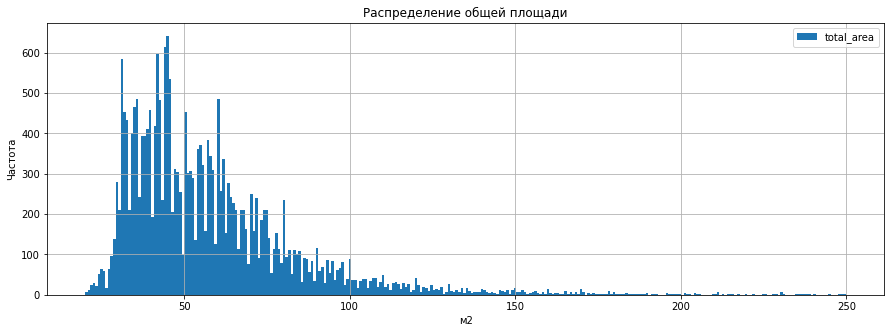

In [95]:
data.plot(y='total_area', kind='hist', bins=300, grid=True, figsize=(15,5))
plt.title("Распределение общей площади")
plt.xlabel("м2")
plt.ylabel("Частота");

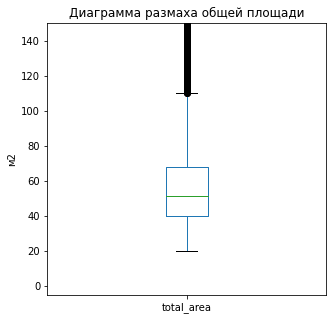

In [96]:
data['total_area'].plot(kind='box', ylim=(-5, 150), figsize=(5,5));
plt.title("Диаграмма размаха общей площади")
plt.ylabel("м2");

In [97]:
data['total_area'].describe()

count    23253.000000
mean        57.869877
std         26.419689
min         20.100000
25%         40.000000
50%         51.500000
75%         68.100000
max        249.900000
Name: total_area, dtype: float64

Рассмотрим подробнее часто встречающиеся значения

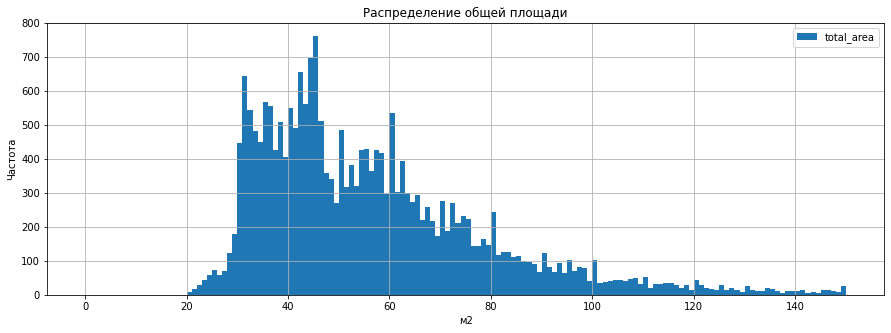

In [98]:
data.plot(y='total_area', kind='hist', bins=150, grid=True, figsize=(15,5), range=(0,150))
plt.title("Распределение общей площади")
plt.xlabel("м2")
plt.ylabel("Частота");

In [99]:
data.query('total_area < 22')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
114,5,4000000.0,21.40,2019-02-07,1,2.90,8,8.30,7,False,False,False,6.30,0,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,NaN,Санкт-Петербург,186915.887850,3,2,2019,другой,5
1588,3,1900000.0,21.89,2018-11-01,1,NaN,19,10.93,17,False,False,False,NaN,0,посёлок Бугры,NaN,NaN,<NA>,NaN,<NA>,NaN,22.0,Бугры,86797.624486,3,11,2018,другой,<NA>
1608,12,2150000.0,20.10,2019-01-30,1,NaN,9,NaN,1,True,False,False,NaN,0,Санкт-Петербург,26646.0,12147.0,0,NaN,0,NaN,13.0,Санкт-Петербург,106965.174129,2,1,2019,первый,12
2461,7,1750000.0,21.10,2018-10-15,1,2.50,5,11.40,2,False,False,False,5.20,1,посёлок Ильичёво,NaN,NaN,<NA>,NaN,<NA>,NaN,92.0,Ильичёво,82938.388626,0,10,2018,другой,<NA>
6544,4,2740000.0,20.30,2018-12-18,1,3.00,6,16.00,1,False,False,False,4.00,0,Санкт-Петербург,26191.0,4893.0,0,NaN,1,1018.0,29.0,Санкт-Петербург,134975.369458,1,12,2018,первый,4
7047,9,2800000.0,21.00,2017-09-23,1,NaN,5,14.90,3,False,False,False,3.80,0,Санкт-Петербург,19676.0,3974.0,0,NaN,3,518.0,108.0,Санкт-Петербург,133333.333333,5,9,2017,другой,3
7577,11,2000000.0,20.60,2018-09-19,1,NaN,18,10.55,17,False,False,False,NaN,0,Никольское,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,Никольское,97087.378641,2,9,2018,другой,<NA>
7755,1,1811250.0,20.67,2016-03-28,1,2.65,24,14.95,13,False,False,False,14.95,1,поселок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,98.0,Мурино,87626.995646,0,3,2016,другой,<NA>
8271,11,2300000.0,21.30,2018-03-16,0,NaN,22,18.00,1,False,True,False,NaN,2,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,56.0,Мурино,107981.220657,4,3,2018,первый,<NA>
8423,7,1740000.0,21.70,2017-08-17,1,2.75,12,15.20,9,False,False,False,NaN,0,деревня Куттузи,NaN,NaN,<NA>,NaN,<NA>,NaN,74.0,Куттузи,80184.331797,3,8,2017,другой,<NA>


**Вывод:** После предобработки в данной выборке остались объекты недвижимости общей площадью от 20м2 до 250м2. Чаще всего в объявлениях встречается недвижимость от 40м2 до 70м2. В пределах от 30 до 70м2 на гистограмме видно разбиение по группам:
- около 30 м2
- 45 м2
- 55-62 м2\
Причиной может быть то что строительные компании ориентируются на некоторые предпочтительные значения площади квартиры, возможно от количества комнат или класса здания.

Также можно заметить некоторое увеличение частоты возле круглых значений 60, 80, 100. Возможно из-за выбора проектировщиками ровных чисел, либо пользователи склонны округлять.

#### жилая площадь

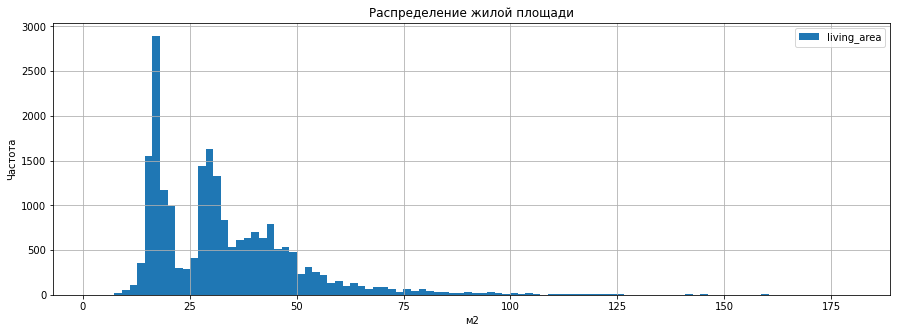

In [100]:
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(15,5))
plt.title("Распределение жилой площади")
plt.xlabel("м2")
plt.ylabel("Частота");

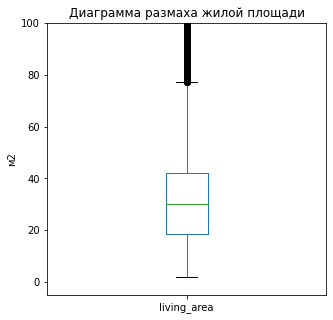

In [101]:
data['living_area'].plot(kind='box', ylim=(-5, 100), figsize=(5,5))
plt.title("Диаграмма размаха жилой площади")
plt.ylabel("м2");

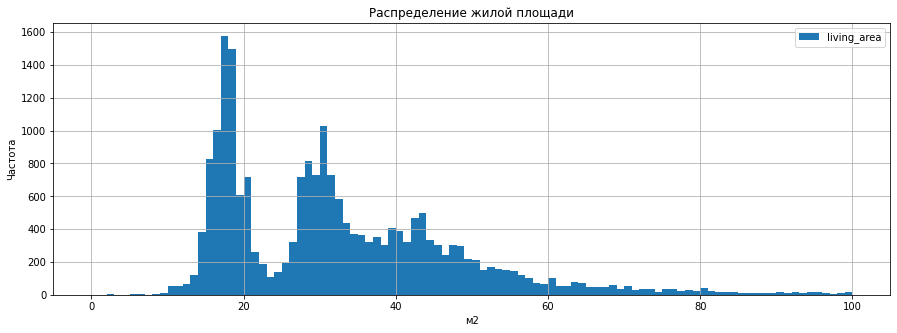

In [102]:
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(15,5), range=(0,100))
plt.title("Распределение жилой площади")
plt.xlabel("м2")
plt.ylabel("Частота");

Видим две четких ~ 18м2 и 30м2 и одну расплывчатую группу значений возле 44-45м2.

In [103]:
data['living_area'].describe()

count    21406.000000
mean        33.137737
std         17.599956
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        180.000000
Name: living_area, dtype: float64

На гистограмме виден "хвост" значений слева, с площадью менее 8 м2.\
*8 м2 минимальное значение площади жилой комнаты*

In [104]:
data.query('living_area < 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0,Санкт-Петербург,108292.682927,6,7,2017,последний,13
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0,Санкт-Петербург,122115.384615,1,2,2018,другой,6
16431,13,3799000.0,31.0,2018-04-12,1,2.6,5,6.0,1,False,False,False,17.0,0,Санкт-Петербург,32177.0,4826.0,1,430.0,0,NaN,168.0,Санкт-Петербург,122548.387097,3,4,2018,первый,4
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25,5.0,8,False,True,False,NaN,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0,Санкт-Петербург,121818.181818,5,8,2018,другой,11
19251,19,4050000.0,33.0,2018-10-15,1,2.5,22,6.5,21,False,False,False,18.0,0,Санкт-Петербург,9258.0,10592.0,1,458.0,0,NaN,44.0,Санкт-Петербург,122727.272727,0,10,2018,другой,10
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,False,True,False,NaN,0,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,66.0,Мурино,101304.347826,0,1,2018,другой,<NA>
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9,5.4,1,False,False,False,9.8,0,Санкт-Петербург,29338.0,11270.0,1,584.0,0,NaN,33.0,Санкт-Петербург,78608.247423,3,2,2019,первый,11


Недвижимость с жилой площадью на одну комнату меньше 8 м2

In [105]:
data.query('(living_area / rooms) < 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
542,8,1750000.0,40.00,2016-04-28,5,NaN,5,28.60,1,False,False,False,5.00,0,Кингисепп,NaN,NaN,<NA>,NaN,<NA>,NaN,127.0,Кингисепп,43750.000000,3,4,2016,первый,<NA>
1326,8,8100000.0,52.00,2017-01-29,2,2.70,25,9.00,15,False,False,False,32.00,2,Санкт-Петербург,35555.0,15561.0,0,NaN,1,1180.0,337.0,Санкт-Петербург,155769.230769,6,1,2017,другой,15
1378,16,15990000.0,58.50,2016-11-01,2,2.85,12,15.00,5,False,False,False,27.00,2,Санкт-Петербург,28529.0,6832.0,1,592.0,0,NaN,510.0,Санкт-Петербург,273333.333333,1,11,2016,другой,6
2309,10,4200000.0,62.40,2017-06-15,2,2.60,9,8.40,6,False,False,False,41.00,2,посёлок Шушары,23662.0,29448.0,0,NaN,0,NaN,111.0,Шушары,67307.692308,3,6,2017,другой,29
3242,7,4440000.0,41.00,2017-07-02,1,NaN,17,3.00,17,False,False,False,11.00,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0,Санкт-Петербург,108292.682927,6,7,2017,последний,13
3761,19,4750000.0,45.00,2019-02-22,2,2.50,12,14.00,8,False,False,False,20.00,0,Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,Кудрово,105555.555556,4,2,2019,другой,<NA>
3854,4,3725000.0,36.65,2018-05-27,2,2.70,18,11.15,3,False,False,False,15.69,2,посёлок Шушары,13478.0,19265.0,0,NaN,1,478.0,105.0,Шушары,101637.107776,6,5,2018,другой,19
4806,8,6550000.0,81.50,2018-10-14,3,NaN,6,22.50,3,False,False,False,30.00,1,Всеволожск,NaN,NaN,<NA>,NaN,<NA>,NaN,34.0,Всеволожск,80368.098160,6,10,2018,другой,<NA>
5314,15,1200000.0,41.80,2017-07-06,3,NaN,3,20.40,3,False,False,False,9.20,0,посёлок Возрождение,NaN,NaN,<NA>,NaN,<NA>,NaN,83.0,Возрождение,28708.133971,3,7,2017,последний,<NA>
5847,19,3700000.0,54.00,2018-09-07,2,2.50,14,12.50,11,False,False,False,12.00,2,Колпино,27638.0,33424.0,0,NaN,0,NaN,8.0,Колпино,68518.518519,4,9,2018,другой,33


Получаем значения где на одну жилую комнату приходится менее 8 м2. Странные значения, возможно ошибка при вводе пользователями.

**Вывод:**
В выборке значения столбца жилой площади варьируется от 2м2 до 180м2. Основное число значений лежит в диапазоне от 18м2 до 42м2. Медианное значение 30м2 среднее 33м2. Также смещение в сторону увеличения площади.


На гистограмме похожее разбиение по группам как и у общей площади, вероятнее всего вызванное высокой частотой одинаковых или близких значений жилой площади при типовой массовой застройке.

#### площадь кухни

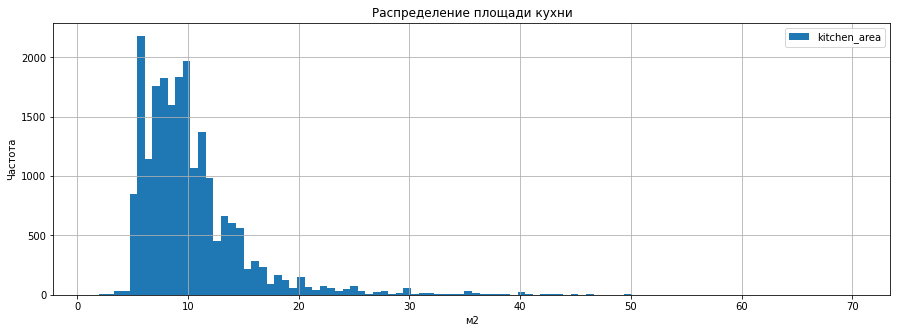

In [106]:
data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize=(15,5))
plt.title("Распределение площади кухни")
plt.xlabel("м2")
plt.ylabel("Частота");

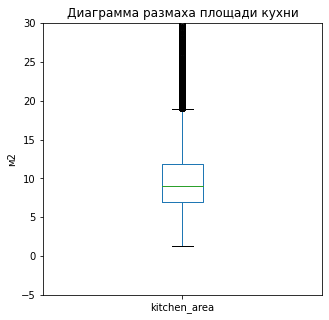

In [107]:
data['kitchen_area'].plot(kind='box', ylim=(-5, 30), figsize=(5,5))
plt.title("Диаграмма размаха площади кухни")
plt.ylabel("м2");

In [108]:
data['kitchen_area'].describe()

count    21043.000000
mean        10.286151
std          5.052813
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         70.000000
Name: kitchen_area, dtype: float64

In [109]:
data.query('kitchen_area < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
906,15,2600000.0,27.00,2017-07-10,1,2.75,23,18.0,18,False,False,False,2.00,0,Санкт-Петербург,22131.0,17459.0,0,NaN,1,411.0,10.0,Санкт-Петербург,96296.296296,0,7,2017,другой,17
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5,16.0,5,False,False,False,2.00,0,Санкт-Петербург,31960.0,4914.0,2,426.0,1,936.0,54.0,Санкт-Петербург,129166.666667,0,6,2018,последний,4
7950,3,5967734.0,66.40,2017-02-07,2,NaN,4,44.4,2,False,False,False,2.89,0,Санкт-Петербург,44870.0,20802.0,0,NaN,0,NaN,335.0,Санкт-Петербург,89875.512048,1,2,2017,другой,20
9138,17,2920000.0,23.29,2018-12-12,1,NaN,3,21.0,1,False,False,False,2.00,0,Санкт-Петербург,19506.0,4008.0,0,NaN,2,45.0,107.0,Санкт-Петербург,125375.697724,2,12,2018,первый,4
11033,6,5350000.0,32.00,2016-04-20,1,NaN,14,16.0,10,False,False,False,2.00,0,Санкт-Петербург,19008.0,3953.0,0,NaN,1,69.0,210.0,Санкт-Петербург,167187.500000,2,4,2016,другой,3
16367,2,2720000.0,25.70,2017-10-30,1,NaN,19,22.6,11,False,False,False,2.00,0,Санкт-Петербург,14472.0,13268.0,0,NaN,0,NaN,109.0,Санкт-Петербург,105836.575875,0,10,2017,другой,13
17834,5,2940000.0,34.70,2017-10-09,1,NaN,26,15.5,14,False,False,False,2.30,1,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,318.0,Мурино,84726.224784,0,10,2017,другой,<NA>
20217,7,4250000.0,28.50,2019-05-01,1,2.80,14,19.5,10,False,False,False,1.30,0,Санкт-Петербург,37199.0,12721.0,0,NaN,0,NaN,NaN,Санкт-Петербург,149122.807018,2,5,2019,другой,12


In [110]:
data.query('kitchen_area > 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
6193,19,24300000.0,230.0,2016-06-03,4,NaN,3,90.0,2,False,False,False,70.0,0,Санкт-Петербург,39422.0,15354.0,0,NaN,1,345.0,397.0,Санкт-Петербург,105652.173913,4,6,2016,другой,15
14900,20,25900000.0,125.6,2018-08-14,2,4.0,4,42.7,4,False,False,False,62.5,2,Пушкин,13426.0,25580.0,0,NaN,0,NaN,194.0,Пушкин,206210.191083,1,8,2018,последний,25
15780,9,12990000.0,119.6,2017-03-13,3,3.0,5,36.4,4,False,False,False,64.0,4,Пушкин,18616.0,30770.0,1,569.0,0,NaN,NaN,Пушкин,108612.040134,0,3,2017,другой,30
18447,17,21800000.0,187.0,2018-01-14,5,NaN,4,120.0,4,False,False,False,65.0,0,Санкт-Петербург,43758.0,15461.0,1,756.0,2,278.0,NaN,Санкт-Петербург,116577.540107,6,1,2018,последний,15
19499,10,8000000.0,118.0,2017-08-31,3,3.0,5,36.0,4,False,False,False,64.0,4,Пушкин,18616.0,30770.0,1,569.0,0,NaN,7.0,Пушкин,67796.610169,3,8,2017,другой,30
22980,19,24500000.0,155.4,2017-10-10,3,3.0,4,72.0,2,False,False,False,65.0,0,Санкт-Петербург,43758.0,15461.0,1,756.0,2,278.0,325.0,Санкт-Петербург,157657.657658,1,10,2017,другой,15


**Вывод:**
В датасете в столбце kitchen_area значения представлены в диапазоне от 1.3м2 до 70м2. Основная масса значений от 7м2 до 12м2.
Средний размер кухни 10.3 м2, медианное значение не сильно отличается 9м2.
Значения площади кухни менее 3м2 можно считать либо ошибкой при вводе, либо бывшие общежития с разделение общей кухни на несколько квартир.

#### цена объекта

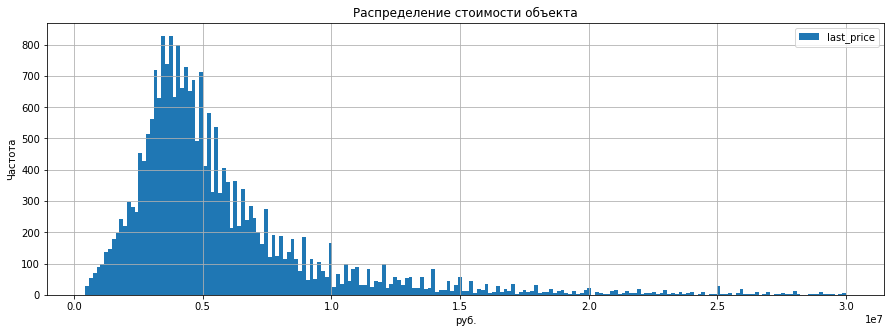

In [111]:
data.plot(y='last_price', kind='hist', bins=200, grid=True, figsize=(15,5))
plt.title("Распределение стоимости объекта")
plt.xlabel("руб.")
plt.ylabel("Частота");

Большая часть сконцентрирована до 10 000 000

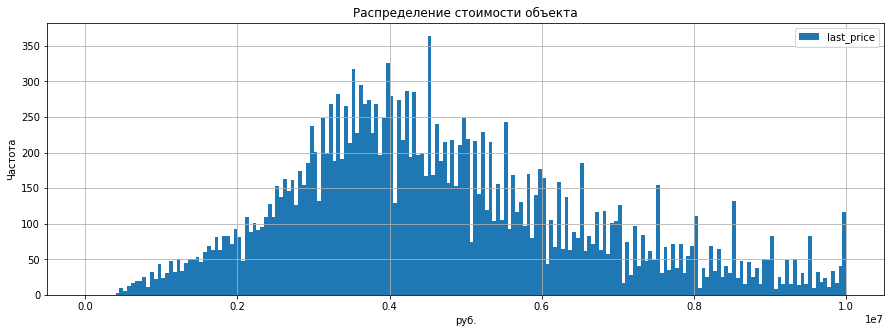

In [112]:
data.plot(y='last_price', kind='hist', bins=200, grid=True, figsize=(15,5), range=(0,10000000))
plt.title("Распределение стоимости объекта")
plt.xlabel("руб.")
plt.ylabel("Частота");

Более подробно рассмотрев пик значений, видно что до 10 000 000 значения распределены равномерно

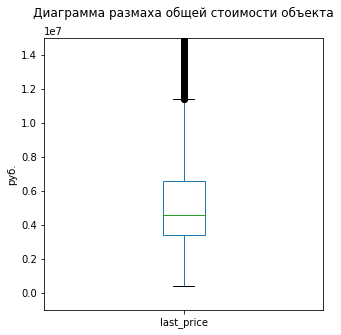

In [113]:
data['last_price'].plot(kind='box', ylim=(-1000000, 15000000), figsize=(5,5))
plt.title("Диаграмма размаха общей стоимости объекта\n")
plt.ylabel("руб.");

In [114]:
data['last_price'].describe()

count    2.325300e+04
mean     5.699307e+06
std      3.927482e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      2.999900e+07
Name: last_price, dtype: float64

In [115]:
data.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.0,1,False,False,False,5.8,0,городской посёлок Будогощь,NaN,NaN,<NA>,NaN,<NA>,NaN,233.0,Будогощь,10714.285714,0,7,2017,первый,<NA>
6859,6,490000.0,40.0,2017-12-11,1,NaN,5,NaN,3,False,False,False,NaN,0,деревня Старополье,NaN,NaN,<NA>,NaN,<NA>,NaN,43.0,Старополье,12250.000000,0,12,2017,другой,<NA>
9581,7,450000.0,43.4,2018-08-31,2,NaN,5,30.3,3,False,False,False,5.5,0,деревня Старополье,NaN,NaN,<NA>,NaN,<NA>,NaN,96.0,Старополье,10368.663594,4,8,2018,другой,<NA>
10782,3,490000.0,29.1,2016-05-05,1,2.50,5,17.0,5,False,False,False,5.5,0,Сланцы,NaN,NaN,<NA>,NaN,<NA>,NaN,719.0,Сланцы,16838.487973,3,5,2016,последний,<NA>
14911,5,430000.0,54.0,2018-06-26,2,NaN,3,NaN,3,False,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,<NA>,NaN,<NA>,NaN,44.0,Свирь,7962.962963,1,6,2018,последний,<NA>
16032,8,480000.0,32.0,2019-01-06,1,NaN,2,16.0,1,False,False,False,NaN,0,Сланцы,NaN,NaN,<NA>,NaN,<NA>,NaN,83.0,Сланцы,15000.000000,6,1,2019,первый,<NA>
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,NaN,1,False,False,False,NaN,0,деревня Вахнова Кара,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0,Вахнова Кара,11688.311688,2,7,2018,первый,<NA>
16274,18,440000.0,40.0,2018-07-10,1,NaN,5,NaN,1,False,False,False,NaN,0,деревня Старополье,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0,Старополье,11000.000000,1,7,2018,первый,<NA>
17456,7,430000.0,30.4,2019-04-22,1,NaN,2,16.0,1,False,False,False,6.0,0,Сланцы,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,Сланцы,14144.736842,0,4,2019,первый,<NA>
17676,0,450000.0,36.5,2018-02-01,1,NaN,5,17.3,4,False,False,False,8.5,1,деревня Ям-Тесово,NaN,NaN,<NA>,NaN,<NA>,NaN,120.0,Ям-Тесово,12328.767123,3,2,2018,другой,<NA>


В пригородах Санкт-Петербурга можно найти квартиру стоимостью до 500 000

Посмотрим на сверхдорогую недвижимость

In [116]:
data.query('last_price > 28000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
750,9,29500000.0,188.80,2017-03-04,7,2.70,2,119.30,1,False,False,False,10.20,0,Санкт-Петербург,20965.0,814.0,0,NaN,2,267.0,246.0,Санкт-Петербург,156250.000000,5,3,2017,первый,0
2044,20,29000000.0,108.70,2018-08-20,3,3.00,15,55.70,14,False,False,False,24.70,1,Санкт-Петербург,33175.0,4714.0,1,194.0,0,NaN,NaN,Санкт-Петербург,266789.328427,0,8,2018,другой,4
2330,1,29216000.0,176.00,2016-10-17,5,3.10,16,100.10,16,False,False,False,19.00,0,Санкт-Петербург,37434.0,8460.0,1,441.0,2,427.0,900.0,Санкт-Петербург,166000.000000,0,10,2016,последний,8
2414,20,29500000.0,115.00,2017-07-21,3,3.00,2,69.75,2,False,False,False,19.20,4,Пушкин,14456.0,26609.0,3,229.0,3,172.0,328.0,Пушкин,256521.739130,4,7,2017,последний,26
2705,19,28570000.0,130.00,2017-10-02,4,NaN,4,92.80,2,False,False,False,12.50,0,Санкт-Петербург,20250.0,1637.0,3,226.0,3,60.0,501.0,Санкт-Петербург,219769.230769,0,10,2017,другой,1
2882,6,28099500.0,174.00,2018-12-19,3,NaN,10,NaN,7,False,False,False,NaN,0,Санкт-Петербург,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,Санкт-Петербург,161491.379310,2,12,2018,другой,<NA>
3680,20,29999000.0,159.90,2019-03-18,5,3.25,6,109.40,5,False,False,False,11.00,0,Санкт-Петербург,23477.0,4259.0,0,NaN,0,NaN,NaN,Санкт-Петербург,187611.006879,0,3,2019,другой,4
4289,18,28899000.0,123.00,2019-01-25,3,3.10,10,36.00,5,False,False,False,38.00,3,Санкт-Петербург,26084.0,5807.0,3,411.0,1,478.0,NaN,Санкт-Петербург,234951.219512,4,1,2019,другой,5
4559,9,29900000.0,240.00,2016-06-01,4,NaN,6,99.60,5,False,False,False,36.30,2,Санкт-Петербург,26209.0,6324.0,2,594.0,0,NaN,174.0,Санкт-Петербург,124583.333333,2,6,2016,другой,6
4978,8,29000000.0,228.00,2016-12-29,4,3.50,3,141.00,2,False,False,False,40.40,1,Пушкин,14651.0,26805.0,3,421.0,3,237.0,572.0,Пушкин,127192.982456,3,12,2016,другой,26


**Вывод:**
Стоимость недвижимости наиболее часто распределена от 3,4 до 6,8 млн. После отделения выбросов минимальная стоимость без учета выброса 430000. Максимальная 30 000 000. Медиана 4,6 млн а среднее из-за значений с высокой стоимостью смещено в большую сторону - 5,7 млн


#### количество комнат

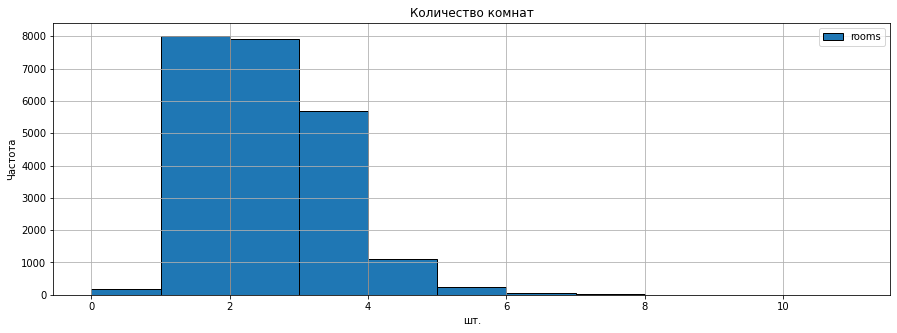

In [117]:
data.plot(y='rooms', kind='hist', bins=11, grid=True, figsize=(15,5), ec='k')
plt.title("Количество комнат")
plt.xlabel("шт.")
plt.ylabel("Частота");

1, 2, и 3 комнатная недвижимость преобладает по частоте

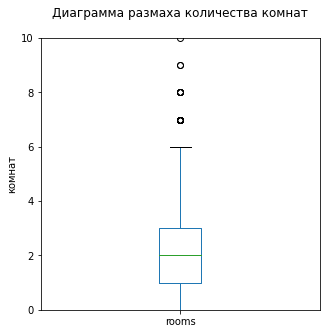

In [118]:
data['rooms'].plot(kind='box', ylim=(0, 10), figsize=(5,5))
plt.title("Диаграмма размаха количества комнат\n")
plt.ylabel("комнат");

In [119]:
data['rooms'].describe()

count    23253.000000
mean         2.033372
std          1.004765
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [120]:
data.query('rooms > 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,NaN,Санкт-Петербург,95264.017420,6,7,2018,последний,3
8860,12,17000000.0,235.0,2018-07-14,9,3.00,6,NaN,3,False,False,False,NaN,0,Санкт-Петербург,24466.0,5034.0,1,346.0,0,NaN,90.0,Санкт-Петербург,72340.425532,5,7,2018,другой,5
13019,0,22250000.0,249.9,2019-04-23,9,3.20,5,157.0,5,False,False,False,12.4,0,Санкт-Петербург,10328.0,9987.0,2,352.0,0,NaN,NaN,Санкт-Петербург,89035.614246,1,4,2019,последний,9
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5,161.4,2,False,False,False,19.8,0,Санкт-Петербург,24353.0,4921.0,1,368.0,0,NaN,11.0,Санкт-Петербург,71726.052753,0,7,2016,другой,4


In [121]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
144,1,2450000.0,27.00,2017-03-30,0,NaN,24,15.50,2,False,True,False,NaN,2,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,181.0,Мурино,90740.740741,3,3,2017,другой,<NA>
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.00,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0,Кудрово,92800.000000,2,9,2017,первый,<NA>
440,8,2480000.0,27.11,2018-03-12,0,NaN,17,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0,Санкт-Петербург,91479.158982,0,3,2018,другой,15
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.30,19,False,False,True,NaN,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0,Парголово,98110.465116,1,3,2017,другой,19
608,2,1850000.0,25.00,2019-02-20,0,NaN,10,NaN,7,False,True,False,NaN,0,посёлок Шушары,NaN,NaN,<NA>,NaN,<NA>,NaN,29.0,Шушары,74000.000000,2,2,2019,другой,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0,Санкт-Петербург,123076.923077,4,9,2017,другой,13
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24,18.00,4,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,4.0,Мурино,90252.707581,3,9,2017,другой,<NA>
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0,Санкт-Петербург,128846.153846,4,9,2018,другой,17
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9,18.00,8,False,False,True,NaN,2,Никольское,NaN,NaN,<NA>,NaN,<NA>,NaN,82.0,Никольское,50000.000000,5,11,2017,другой,<NA>


Для недвижимости с "0" комнат, в столбцах studio и open_plan значения True встречаются в обоих столбцах. Проверим  только ли с 0 комнат.

In [122]:
data.pivot_table(index='rooms', values=('studio', 'open_plan'), aggfunc='sum')

,open_plan,studio
rooms,,
0,56,129
1,3,11
2,1,0
3,2,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0


Посмотрим на студии с 1 комнатой

In [123]:
data.query('rooms > 0 and studio==True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
2389,5,2250000.0,25.41,2016-06-07,1,NaN,12,17.08,8,False,True,False,NaN,2,Санкт-Петербург,14125.0,12921.0,2,328.0,2,485.0,26.0,Санкт-Петербург,88547.815821,1,6,2016,другой,12
3187,13,3800000.0,27.00,2016-05-17,1,NaN,14,18.00,8,False,True,False,NaN,2,Санкт-Петербург,50348.0,16053.0,0,NaN,0,NaN,45.0,Санкт-Петербург,140740.740741,1,5,2016,другой,16
4180,4,4500000.0,34.00,2016-04-25,1,2.8,10,21.00,10,False,True,False,NaN,2,Санкт-Петербург,23609.0,5299.0,0,NaN,1,433.0,62.0,Санкт-Петербург,132352.941176,0,4,2016,последний,5
8683,10,3500000.0,32.50,2016-05-05,1,3.0,23,29.90,11,False,True,False,NaN,2,Санкт-Петербург,34967.0,14640.0,0,NaN,1,564.0,45.0,Санкт-Петербург,107692.307692,3,5,2016,другой,14
11026,1,2800000.0,28.00,2016-05-04,1,NaN,26,19.00,6,False,True,False,NaN,2,посёлок Парголово,53511.0,19687.0,0,NaN,0,NaN,45.0,Парголово,100000.000000,2,5,2016,другой,19
12935,10,2200000.0,31.00,2016-05-15,1,2.5,8,22.30,5,False,True,False,NaN,1,Никольское,NaN,NaN,<NA>,NaN,<NA>,NaN,44.0,Никольское,70967.741935,6,5,2016,другой,<NA>
15142,2,2700000.0,30.00,2016-05-10,1,NaN,21,26.00,6,False,True,False,NaN,0,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,55.0,Кудрово,90000.000000,1,5,2016,другой,<NA>
18732,4,2400000.0,22.00,2016-05-06,1,NaN,10,15.00,6,False,True,False,NaN,0,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0,Кудрово,109090.909091,4,5,2016,другой,<NA>
20086,0,1550000.0,22.00,2016-05-11,1,2.7,15,10.94,14,False,True,False,NaN,2,Никольское,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0,Никольское,70454.545455,2,5,2016,другой,<NA>
21702,9,2349000.0,23.40,2016-05-19,1,2.7,20,16.00,8,False,True,False,NaN,1,деревня Новое Девяткино,NaN,NaN,<NA>,NaN,<NA>,NaN,34.0,Новое Девяткино,100384.615385,3,5,2016,другой,<NA>


И посмотрим на квартиры с открытой планировкой с больше чем 0 комнат

In [124]:
data.query('rooms > 0 and open_plan==True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
1379,3,6000000.0,44.2,2015-11-10,1,NaN,25,17.4,23,False,False,True,NaN,1,Санкт-Петербург,10663.0,12738.0,0,NaN,0,NaN,231.0,Санкт-Петербург,135746.606335,1,11,2015,другой,12
5668,9,3550000.0,36.7,2016-04-25,1,2.75,16,17.8,2,False,False,True,NaN,2,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,61.0,Кудрово,96730.245232,0,4,2016,другой,<NA>
8861,13,5500000.0,64.5,2015-11-13,3,3.00,5,48.0,2,False,False,True,NaN,0,Санкт-Петербург,20040.0,2621.0,2,205.0,2,204.0,229.0,Санкт-Петербург,85271.317829,4,11,2015,другой,2
9063,6,3800000.0,39.0,2016-05-19,1,NaN,17,30.0,1,False,False,True,NaN,0,Санкт-Петербург,36721.0,13635.0,0,NaN,0,NaN,45.0,Санкт-Петербург,97435.897436,3,5,2016,первый,13
12760,0,3350000.0,51.0,2015-01-22,2,2.50,12,30.0,10,False,False,True,NaN,2,Коммунар,NaN,NaN,<NA>,NaN,<NA>,NaN,521.0,Коммунар,65686.274510,3,1,2015,другой,<NA>
14017,13,3990000.0,59.0,2016-03-29,3,2.50,9,37.6,3,False,False,True,NaN,1,Колпино,27820.0,33606.0,0,NaN,1,705.0,81.0,Колпино,67627.118644,1,3,2016,другой,33
19796,1,12000000.0,97.2,2016-04-05,4,3.35,5,71.3,2,False,False,True,NaN,0,Санкт-Петербург,24559.0,4811.0,0,NaN,0,NaN,89.0,Санкт-Петербург,123456.790123,1,4,2016,другой,4


**Вывод:**
Количество комнат в недвижимости представленной в датасете, после отброса анамалий, от 0  до 11. Наиболеее часто встречаются 1, 2, 3, комнатная недвижимость. И медиана и среднее около 2. 

Со столбцами studio и open_plan не совесем понятно есть ли в них смысл или подразумевается одно и тоже. Особенно в квартирах с 0 и 1 комнатой. Да и вопрос как считать - в квартире студии есть комната или так как пространство открытое и ее нет. 

Студия - это квартира где единственная комната гостинная совмещена с кухней, а свободная планировка по идее может быть разделена на комнаты по усмотрению собственника. Существует еще понятие открытой планировки когда стен нет и все пространство открытое и название столбца может вводить в заблуждение. Возможно четких границ этих понятий нет или они слабо различимы.

#### высота потолков

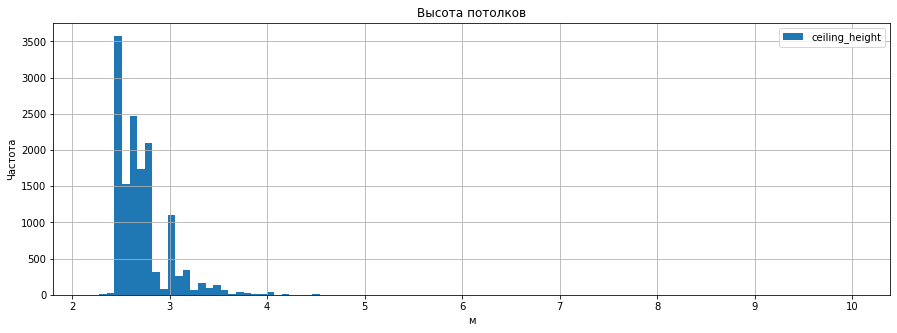

In [125]:
data.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize=(15,5))
plt.title("Высота потолков")
plt.xlabel("м")
plt.ylabel("Частота");

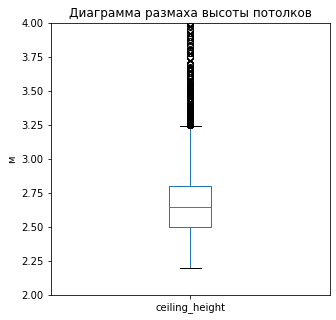

In [126]:
data['ceiling_height'].plot(kind='box', ylim=(2, 4), figsize=(5,5))
plt.title("Диаграмма размаха высоты потолков")
plt.ylabel("м");

In [127]:
data['ceiling_height'].describe()

count    14213.000000
mean         2.718807
std          0.282421
min          2.200000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

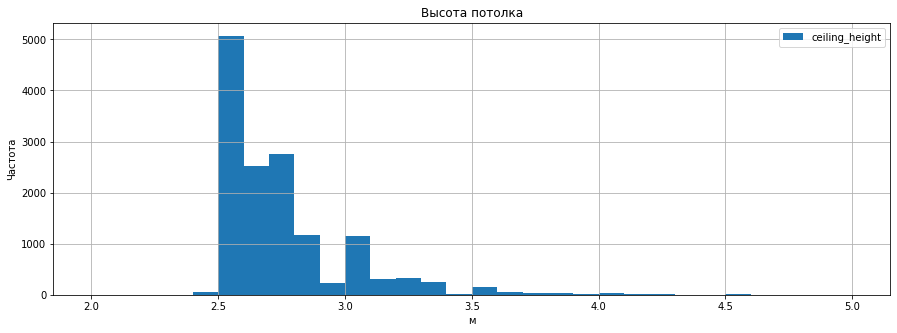

In [128]:
data.plot(y='ceiling_height', kind='hist', bins=30, grid=True, figsize=(15,5), range=(2,5))
plt.title("Высота потолка")
plt.xlabel("м")
plt.ylabel("Частота");

In [129]:
data.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,False,False,7.3,0,деревня Нурма,NaN,NaN,<NA>,NaN,<NA>,NaN,125.0,Нурма,46666.666667,4,3,2018,другой,<NA>
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.3,14,False,False,False,8.3,1,Санкт-Петербург,13069.0,10763.0,0,NaN,1,613.0,14.0,Санкт-Петербург,125555.555556,2,8,2018,другой,10
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16,41.0,1,False,False,False,8.0,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,474.0,Санкт-Петербург,83582.089552,4,11,2016,первый,11
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5,29.0,2,False,False,False,NaN,1,Красное Село,24638.0,28062.0,0,NaN,0,NaN,469.0,Красное Село,99074.074074,1,6,2015,другой,28
22869,0,15000000.0,25.0,2018-07-25,1,10.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19.0,Санкт-Петербург,600000.000000,2,7,2018,последний,8


**Вывод:**
Высота помещений представленных в датасете представлена в диапазоне от 2.2м до 10,0м. 
Выше 6м высота потолка похожа на выброс, но достоверно проверить это мы не сможем.

Чаще всего высота колеблется от 2,5м до 2,8м.
Медианное и среднее значение высоты не сильно отличаются и составляют 2,65м и 2,72м соответственно.

#### этаж квартиры

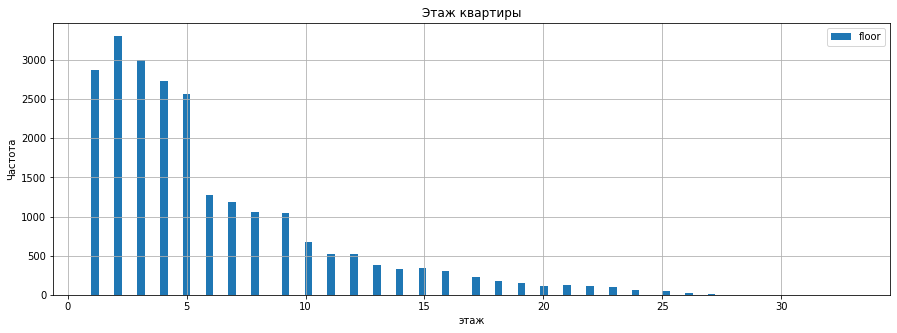

In [130]:
data.plot(y='floor', kind='hist', bins=100, grid=True, figsize=(15,5))
plt.title("Этаж квартиры")
plt.xlabel("этаж")
plt.ylabel("Частота");

1-5 этажи лидеры по числу объявлений, далее выделяется группа 6-9 этажей.

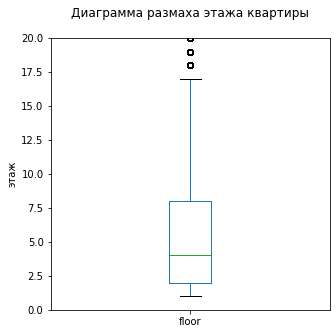

In [131]:
data['floor'].plot(kind='box', ylim=(0, 20), figsize=(5,5))
plt.title("Диаграмма размаха этажа квартиры\n")
plt.ylabel("этаж");

In [132]:
data['floor'].describe()

count    23253.000000
mean         5.911409
std          4.906179
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Вывод:**
В датасете представленна недвижимость находящаяся с 1 по 33 этаж. Преобладает недвижимость с 2 по 8 этаж.

Медиана 4 этаж, а вот среднее почти 6-ой этаж. Среднее выше из-за недвижимости в объявлениях расположенной в высотках на верхних этажах

#### тип этажа квартиры

In [133]:
floor_type_pivot = data.pivot_table(index='floor_type', values='floor', aggfunc=len)
floor_type_pivot['ratio'] = floor_type_pivot['floor'] / floor_type_pivot['floor'].sum()
floor_type_pivot

,floor,ratio
floor_type,,
другой,17133,0.736808
первый,2874,0.123597
последний,3246,0.139595


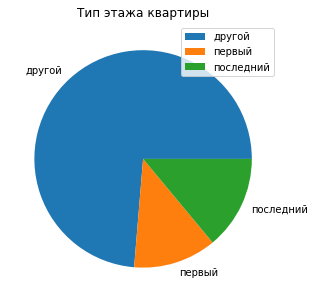

In [134]:
floor_type_pivot.plot(y='ratio', kind='pie',grid=True, figsize=(5,5));
plt.title("Тип этажа квартиры")
plt.xlabel("")
plt.ylabel("");

**Вывод:**

Как видно на диаграмме первый и последний этаж пользуются популярнстью и суммарно занимают больше 1/4 всех объявлений, последний этаж чуть чаще встречается чем первый

#### общее количество этажей в доме

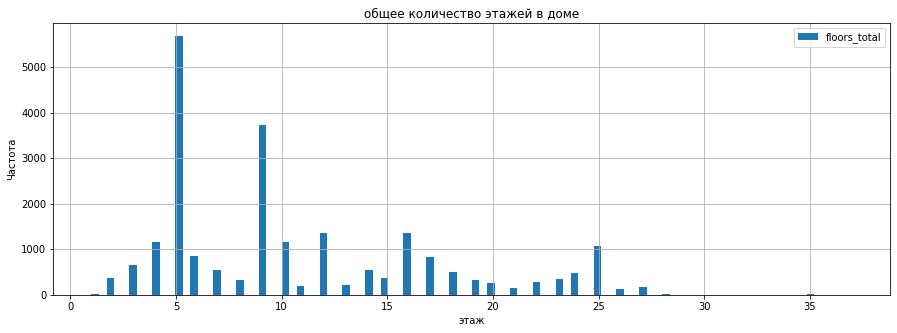

In [135]:
data.plot(y='floors_total', kind='hist', bins=100, grid=True, figsize=(15,5));
plt.title("общее количество этажей в доме")
plt.xlabel("этаж")
plt.ylabel("Частота");

Видно пики часто встречающейся максимальной этажности 5, 9, 10, 12, 16, 25

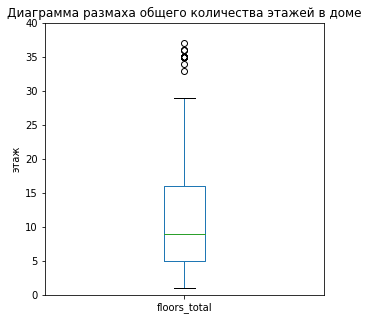

In [136]:
data['floors_total'].plot(kind='box', ylim=(0, 40), figsize=(5,5));
plt.title("Диаграмма размаха общего количества этажей в доме")
plt.ylabel("этаж");

In [137]:
data['floors_total'].describe()

count    23164.000000
mean        10.727724
std          6.609607
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

**Вывод:**
Здания по максимальному количеству этажей распределены в пределах от 1-го  до 37 этажных. Чаще всего в объявлениях встречаются квартиры в зданиях от 5 до 16 этажей, из-за особенностей типовой застройки. Среднее 10.6, медиана 9 этажей.

#### расстояние до центра города в метрах

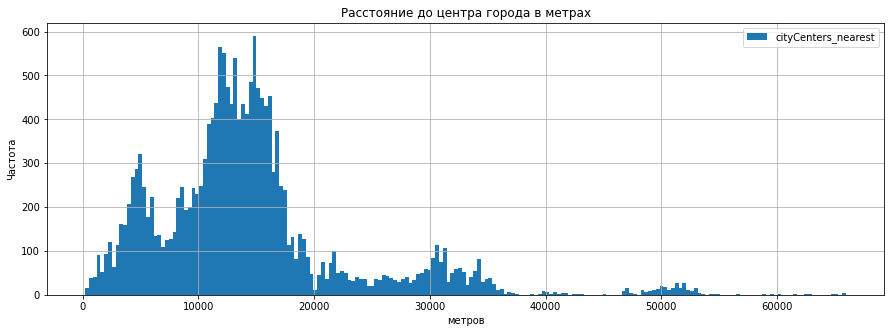

In [138]:
data.plot(y='cityCenters_nearest', kind='hist', bins=200, grid=True, figsize=(15,5))
plt.title("Расстояние до центра города в метрах")
plt.xlabel("метров")
plt.ylabel("Частота");

Есть несколько пиков, концентрации недвижимости по удалению от центра

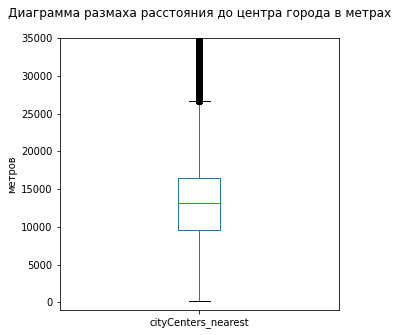

In [139]:
data['cityCenters_nearest'].plot(kind='box', ylim=(-1000, 35000), figsize=(5,5));
plt.title("Диаграмма размаха расстояния до центра города в метрах\n")
plt.ylabel("метров");

In [140]:
data['cityCenters_nearest'].describe()

count    17762.000000
mean     14370.240119
std       8588.026089
min        208.000000
25%       9575.000000
50%      13222.000000
75%      16408.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [141]:
data.query('cityCenters_nearest < 300')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
1182,1,5800000.0,33.6,2016-03-10,1,3.7,7,22.8,4,False,False,False,6.6,0,Санкт-Петербург,21632.0,208.0,3,304.0,3,503.0,167.0,Санкт-Петербург,172619.047619,3,3,2016,другой,0
1934,18,9590000.0,108.0,2017-05-23,2,3.3,5,59.0,2,False,False,False,11.0,0,Санкт-Петербург,21908.0,287.0,3,359.0,3,290.0,69.0,Санкт-Петербург,88796.296296,1,5,2017,другой,0
8614,7,10990000.0,100.0,2015-12-16,3,3.9,5,37.8,3,False,False,False,11.6,0,Санкт-Петербург,21818.0,215.0,3,229.0,2,511.0,265.0,Санкт-Петербург,109900.000000,2,12,2015,другой,0
20873,18,11500000.0,113.5,2018-09-17,3,4.2,7,44.2,6,False,False,False,21.7,1,Санкт-Петербург,21739.0,291.0,2,472.0,2,94.0,NaN,Санкт-Петербург,101321.585903,0,9,2018,другой,0


**Вывод:**
Недвижимость представленная в датасете расположена на расстоянии от 208м до 66 000м от центра города. Чаще всего в объявления дома расположены на удалении от 9 до 16км от центра.

На гистограмме заметны пики концентрации около 5км, 12 - 16км, 30км и 50км, которые могли получится из-за концентрации зоны застройки на этих удалениях. Для 30, 50 возможно попали какие либо поселки с активной застройкой

Необходимо уточнить как расчитываются географические данные удаленности от аэропорта и центра города. При формирование таблицы с объектами до 300м от центра, отображается расстояние до аэропорта 21600+м. Аэропорт в Санкт-Петербурге один - Пулково. Есть один в Кронштадте но он для малых воздушных судов. И до него 35 км по карте.

По Яндекс Картам до Пулково линейкой ~15500м по Google Maps также. 

Или расстояние дано маршрутом по дорогам.
Или возможно точка центра не совпадает с географическим центром небходимо проверить у разработчиков

#### расстояние до ближайшего аэропорта

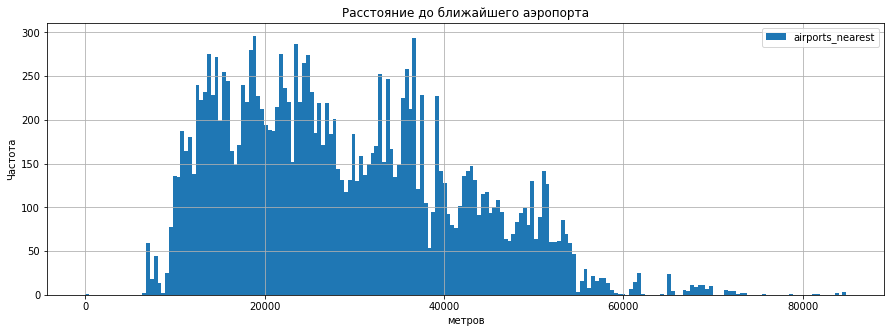

In [142]:
data.plot(y='airports_nearest', kind='hist', bins=200, grid=True, figsize=(15, 5));
plt.title("Расстояние до ближайшего аэропорта")
plt.xlabel("метров")
plt.ylabel("Частота");

На гистограмме также как и на рапределении по удаленности от центра есть не очень четкие группы концентрации застройки.

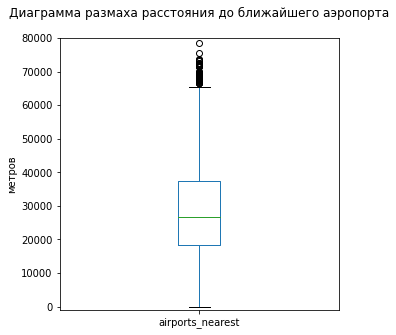

In [143]:
data['airports_nearest'].plot(kind='box', ylim=(-1000, 80000), figsize=(5,5))
plt.title("Диаграмма размаха расстояния до ближайшего аэропорта\n")
plt.ylabel("метров");

In [144]:
data['airports_nearest'].describe()

count    17742.000000
mean     28836.681716
std      12731.468958
min          0.000000
25%      18479.500000
50%      26786.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [145]:
data.query('airports_nearest < 7000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
895,8,2650000.0,28.0,2016-02-16,1,2.55,5,11.7,3,False,False,False,8.5,0,Санкт-Петербург,6995.0,17171.0,1,823.0,0,NaN,705.0,Санкт-Петербург,94642.857143,1,2,2016,другой,17
4017,7,2268000.0,35.0,2017-12-21,1,NaN,9,14.0,6,False,False,False,8.0,0,Санкт-Петербург,6450.0,17461.0,0,NaN,1,444.0,25.0,Санкт-Петербург,64800.000000,3,12,2017,другой,17
5062,11,6000000.0,53.0,2017-12-12,2,2.50,14,32.0,6,False,False,False,9.0,1,Санкт-Петербург,6989.0,13205.0,1,535.0,0,NaN,60.0,Санкт-Петербург,113207.547170,1,12,2017,другой,13
5074,18,3500000.0,28.0,2017-07-10,0,2.65,25,20.0,17,False,True,False,NaN,0,Санкт-Петербург,6989.0,13205.0,1,535.0,0,NaN,28.0,Санкт-Петербург,125000.000000,0,7,2017,другой,13
7778,9,2750000.0,29.0,2017-02-19,1,2.50,4,15.0,1,False,False,False,6.0,0,Санкт-Петербург,6914.0,21486.0,1,215.0,0,NaN,43.0,Санкт-Петербург,94827.586207,6,2,2017,первый,21
10059,0,5800000.0,47.3,2017-12-01,2,2.50,25,27.5,18,False,False,False,8.4,2,Санкт-Петербург,6989.0,13205.0,1,535.0,0,NaN,89.0,Санкт-Петербург,122621.564482,4,12,2017,другой,13
10986,1,3090000.0,42.0,2018-01-16,2,2.50,5,28.0,1,False,False,False,5.0,0,Санкт-Петербург,6992.0,17168.0,1,649.0,0,NaN,31.0,Санкт-Петербург,73571.428571,1,1,2018,первый,17
11294,17,6200000.0,55.6,2019-02-12,2,2.54,14,34.0,2,False,False,False,7.6,5,Санкт-Петербург,6989.0,13205.0,1,535.0,0,NaN,NaN,Санкт-Петербург,111510.791367,1,2,2019,другой,13
12899,8,4199000.0,56.0,2017-12-21,2,NaN,9,27.0,5,False,False,False,15.0,0,Санкт-Петербург,6450.0,17461.0,0,NaN,1,444.0,24.0,Санкт-Петербург,74982.142857,3,12,2017,другой,17
15633,4,6420000.0,67.0,2015-09-18,2,NaN,24,38.0,11,False,False,False,12.0,1,Санкт-Петербург,6989.0,13205.0,1,535.0,0,NaN,311.0,Санкт-Петербург,95820.895522,4,9,2015,другой,13


Ближе чем ~6,5км вокруг аэропорта недвижимости в объявлениях нет. Кроме одного значения

In [146]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0,Санкт-Петербург,201729.106628,6,9,2018,другой,22


Возможно пользователь случайно указал адрес аэропорта. Или кто-то продает однокомнатную квартиру в теминале.

Необходимо попытаться уточнить у разработчиков почему присвоено удаление 0м, возможно ошибка.

**Вывод:**
Данные по удаленности от аэропорта распрделены следующим образом минимальное 6450м без учета ошибочного значения в 0,0м, максимальное удаление почти 85 км.
Основное количество значений находится в пределах от 18,5 до 37,2км.

Как и для данных по удаленности от центра города характерна группировка по концентрации застройки, но не такая четкая

#### расстояние до ближайшего парка

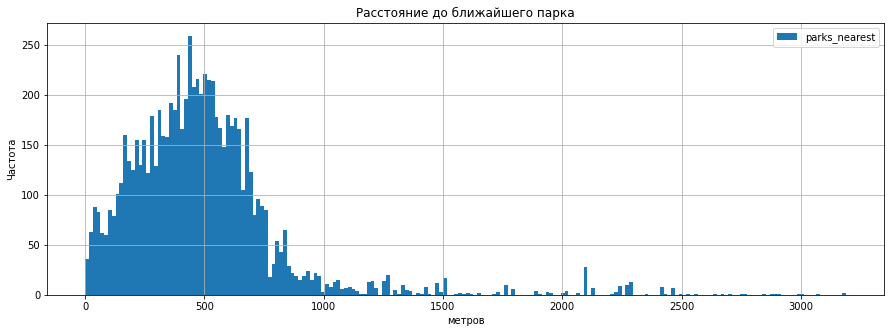

In [147]:
data.plot(y='parks_nearest', kind='hist', bins=200, grid=True, figsize=(15,5));
plt.title("Расстояние до ближайшего парка")
plt.xlabel("метров")
plt.ylabel("Частота");

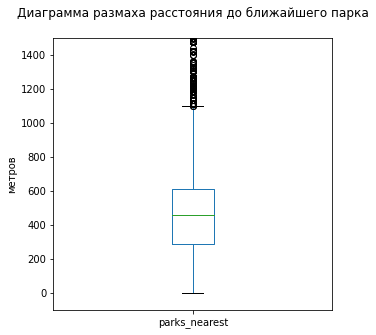

In [148]:
data['parks_nearest'].plot(kind='box', ylim=(-100, 1500), figsize=(5,5))
plt.title("Диаграмма размаха расстояния до ближайшего парка\n")
plt.ylabel("метров");

In [149]:
data['parks_nearest'].describe()

count    7780.000000
mean      494.168766
std       343.157981
min         1.000000
25%       290.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Проверим какие значения присваются `parks_nearest` при `parks_around3000` = 0

In [150]:
data.query('parks_around3000 == 0')['parks_nearest'].unique()

array([  nan, 3064., 3190., 3013.])

Посмотрим если до парка больше 3км какие значения у `parks_around3000`

In [151]:
data.query('parks_nearest >= 3000')['parks_around3000']

1590     0
10959    0
19208    0
19430    0
Name: parks_around3000, dtype: Int64

In [152]:
data[data['parks_nearest'].isna()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.792079,1,12,2018,первый,18
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55.0,Янино-1,95065.789474,0,9,2018,другой,<NA>
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,Парголово,99195.710456,3,11,2017,другой,19
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,Санкт-Петербург,110544.692737,3,4,2019,другой,11
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,189.0,Мурино,87454.764777,2,5,2018,другой,<NA>


Похоже что действительно там где нет парков `parks_nearest`примет значение NaN, а `parks_around3000` будет равным "0"
Заменим значения на -1 чтобы не перепутать, если увидим ккие-либо другие закономерности

In [153]:
data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'] == 0), 'parks_nearest'] = -1

In [154]:
data['parks_nearest'].isna().mean()

0.23609856792671913

In [155]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,-1.0,0,NaN,81.0,Шушары,82920.792079,1,12,2018,первый,18
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,13
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55.0,Янино-1,95065.789474,0,9,2018,другой,<NA>
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,-1.0,0,NaN,155.0,Парголово,99195.710456,3,11,2017,другой,19
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,-1.0,0,NaN,NaN,Санкт-Петербург,110544.692737,3,4,2019,другой,11
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,189.0,Мурино,87454.764777,2,5,2018,другой,<NA>
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,-1.0,0,NaN,289.0,Санкт-Петербург,88524.590164,6,2,2017,другой,15
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,Санкт-Петербург,127525.252525,3,11,2017,другой,13


**Вывод:**
Значения удаления парков от объекта недвижимости лежат в диапазоне от 1м до 3190м. 
Возможно данные с расположением в 1м выглядят странно, но дом может быть окружен парком, или находиться в непосредственной близости от границы парковой зоны.
В объявлениях недвижимость чаще всего располагается от 300 до 600м метров от парка.

#### день публикации объявления

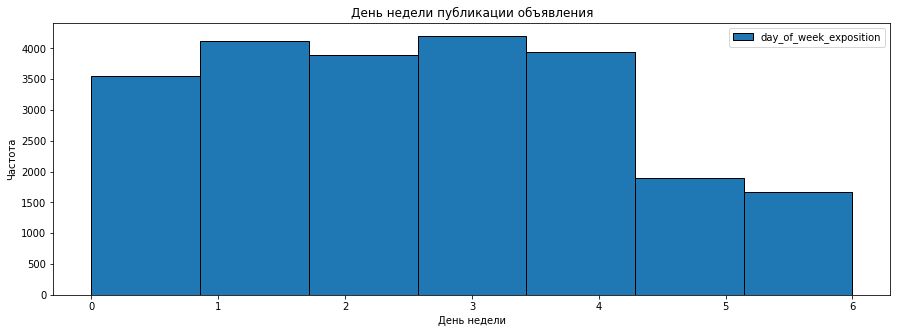

In [156]:
data.plot(y='day_of_week_exposition', kind='hist', bins=7, figsize=(15, 5), ec="k")
plt.title("День недели публикации объявления")
plt.xlabel("День недели")
plt.ylabel("Частота");

**Вывод:**
В выходные объявления подаются реже, в будни с понедельника плавный рост вторник среда четверг пятница примерно на одном уровне. Возможно связано с обилем агенств по недвижимости которые работают в будние дни.

#### месяц публикации объявления

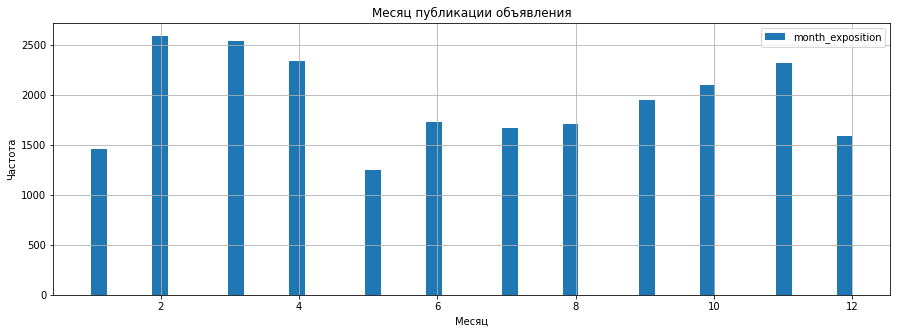

In [157]:
data.plot(y='month_exposition', kind='hist', bins=50, grid=True, figsize=(15, 5))
plt.title("Месяц публикации объявления")
plt.xlabel("Месяц")
plt.ylabel("Частота");

**Вывод:**
Наблюдается некоторая сезонность в продажах. Пик продаж весной и осенью, зимний спад с декабря по январь. И май с минимумом продаж в году переходит в лето, когда недвижимость продают не так охотно.

Возможна взаимосвязь с графиком работы агенств недвижимости: январь и май - полмесяца праздников, лето - отпуска, декабрь - в конце месяца подготовка к новому году.

Также учитывая особенность предоставленных данных с 2014-11-27 по 2019-05-03 даны неполные месяцы ноябрь в 2014 году и май в 2019, что может влиять на результат.

Более подробно по заданию рассмотрим далее

### Как быстро продавались квартиры

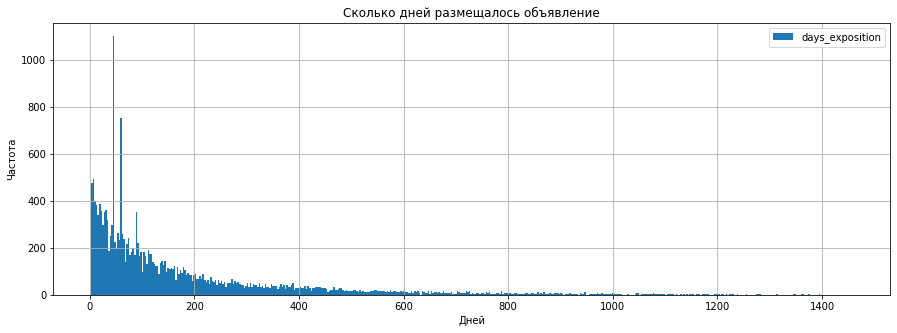

In [158]:
data.plot(y='days_exposition', kind='hist', bins=500, grid=True, figsize=(15, 5))
plt.title("Сколько дней размещалось объявление")
plt.xlabel("Дней")
plt.ylabel("Частота");

Есть резко выделяющиеся по частоте значения, рассмотрим подробнее

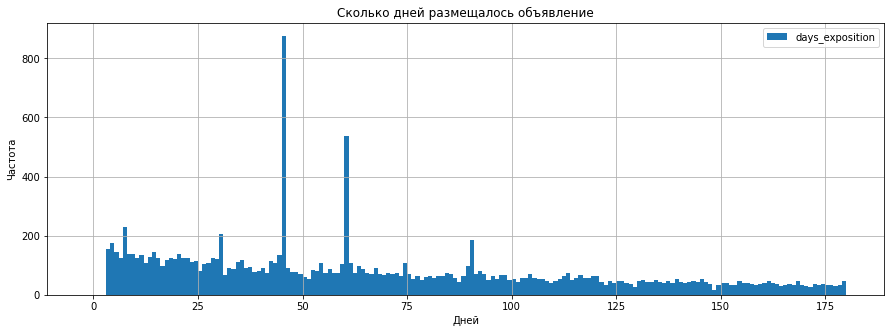

In [159]:
data.plot(y='days_exposition', kind='hist', bins=182, grid=True, figsize=(15, 5), range=(-2, 180))
plt.title("Сколько дней размещалось объявление")
plt.xlabel("Дней")
plt.ylabel("Частота");

Несколько объявлений были сняты в первые 3 после публикации.
Возможные варианты: супербыстрые продажи, ползователь обнаружил ошибку в объявлении и снял его, либо модерация сняла объявление.

Необходимо предложить разработчикам присваивать какой-нибудь id для объекта для отслеживания его судьбы. Например по кадастровому номеру или номеру свидетельства о собственности. Это упростит поиск повторно выложенных объявлений на один и тот же объект

In [160]:
data.days_exposition.value_counts().head(10)

45.0    876
60.0    538
7.0     231
30.0    206
90.0    187
4.0     174
3.0     154
5.0     146
14.0    145
20.0    138
Name: days_exposition, dtype: int64

В топ 5 по длительности до снятия объявления с портала входят 45, 60, 7, 30, 90 дней, похоже что действует какое-то правило сервиса по которому автоматически объявление снимается с портала. Или пользователь получает уведомление, что необходимо продлить объявление и если он его не продляет портал автоматически его снимает.

Теперь возникает вопрос действительно ли произошла продажа недвижимости, и проверяется ли факт продажи порталом? необходимо уточнить у разрабочиков.

Получается days_exposition время до снятия объявления возможно не означающая продажу.

Можно попробывать предположить, что если пользователь продлевает объявление, на 30 день значит он не продал в предыдущий период, далее если он не продлил на 45 день значит продажа произошла в период с 30 до 45 дней

Можно попробовать сгруппировать данные по периодам в 30 дней чтобы сгладить выбросы

In [161]:
interval = range(0, 1580, 30)

pivot_cut_days_exposition =  data.pivot_table(
                                              index=pd.cut(data['days_exposition'], bins=interval), 
                                              values='last_price', 
                                              aggfunc='count'
                                              ).reset_index()

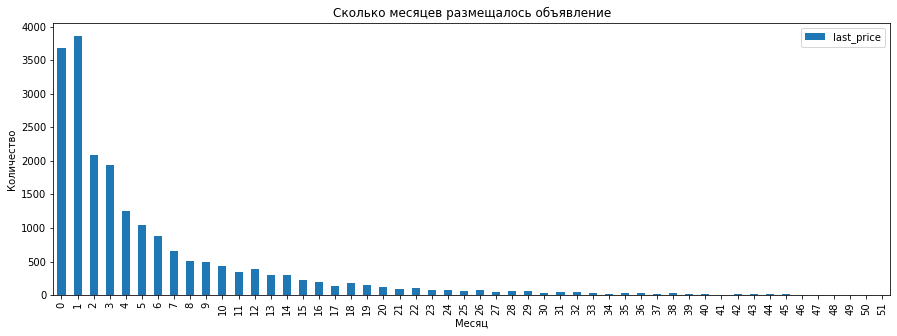

In [162]:
pivot_cut_days_exposition.plot(kind='bar', figsize=(15, 5));
plt.title("Сколько месяцев размещалось объявление")
plt.xlabel("Месяц")
plt.ylabel("Количество");

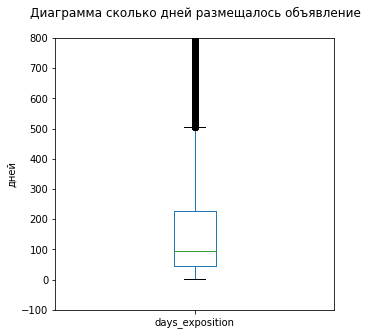

In [163]:
data['days_exposition'].plot(kind='box', ylim=(-100, 800), figsize=(5, 5));
plt.title("Диаграмма сколько дней размещалось объявление\n")
plt.ylabel("дней");

In [164]:
data['days_exposition'].describe()

count    20198.000000
mean       178.833548
std        216.057408
min          3.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1458.000000
Name: days_exposition, dtype: float64

In [165]:
data['days_exposition'].isna().mean()

0.13138089708854772

**Вывод:**

Половина объявлений снимается до 100 дней. По прошествии этого времени частота продаж начинает резко снижаться.

Быстрая продажа - это продажа в первые два месяца со дня публикации объявления.

Необычно долгими можно назвать те, что выходят за пределы 500 дней.

13.4% пропусков возможно указывают сколько объявлений находилось на портале на дату среза.

### Факторы которые больше всего влияют на общую (полную) стоимость объекта

In [166]:
def corr_scatter_line_price (feature, binning_int=10):
    '''
    Функция вывода двух графиков и коэффициента корреляции
    1. Точечная диаграмма всех значений исследуемого столбца и общей стоимости
    2. Линейный график по  медиане из группы, например если binning_int=10 
    занчит первая точка расчитывается как среднее из значений от 0..10
    3. Коэффициент корреляции
    
    '''  
     
    interval_area  = range(0, data[feature].max().astype(int), binning_int)
    
    data.plot(x=feature, 
              y='last_price', 
              kind='scatter', 
              figsize=(10, 5), 
              alpha=0.3,)
    plt.title("Точечная диаграмма"),
    plt.xlabel(feature),
    plt.ylabel("last_price")
    
    data.pivot_table(
                     index=pd.cut(data[feature], bins=interval_area), 
                     values='last_price', 
                     aggfunc='median'
                     ).reset_index()\
        .plot(
              kind = 'line', 
              figsize = (10, 5),
              style='.-', 
              linewidth = 3, 
              markersize = 15
              )
    plt.title("График зависимости по укрупненным группам"),
    plt.xlabel(feature),
    plt.ylabel("last_price")
    
    print('Коэффициент корреляции:', data['last_price'].corr(data[feature]).round(3))

#### Общая площадь

Коэффициент корреляции: 0.788


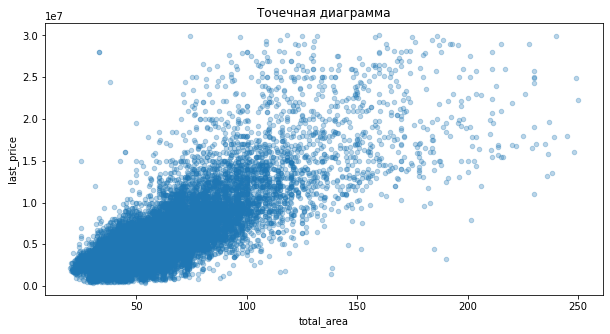

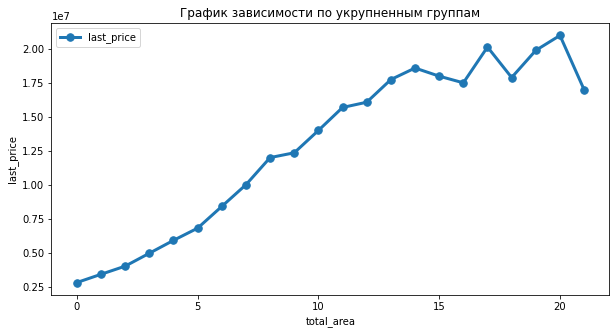

In [167]:
corr_scatter_line_price('total_area', 10)

**Вывод**
Корреляция 0,65 относительно сильная, но по точечной диаграмме видна сильная зависимость до 200м2, на линейном графике по укрупненным группам, зависимость продолжается до 400м2, далее видно даже некоторое снижение, но  в этом диапозоне уже оценивать достоверно сложно из-за небольшого количества объектов с такой площадью

#### Жилая площадь

Коэффициент корреляции: 0.682


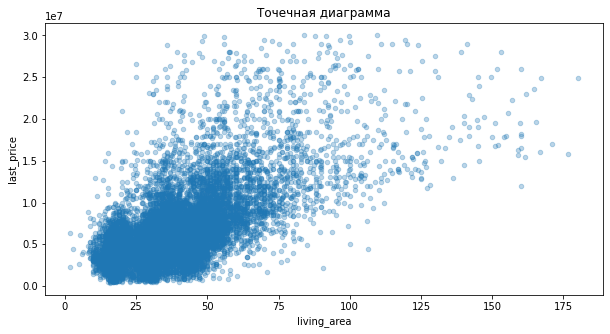

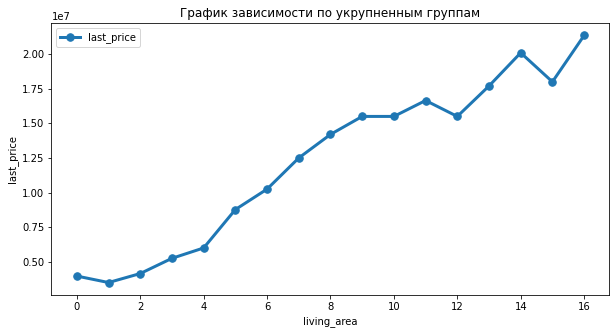

In [168]:
corr_scatter_line_price('living_area', 10)

**Вывод:**
Корреляция с жилой площадью слабее 0,57. До ~140 м2 зависимость сильная, дальше значений мало и судить сложно

#### Площадь кухни

Коэффициент корреляции: 0.601


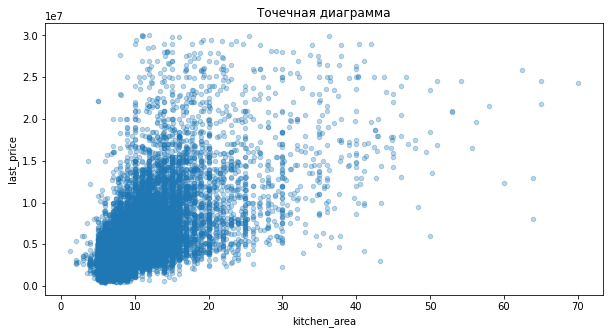

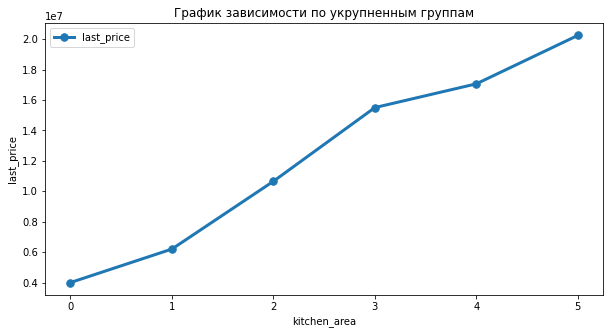

In [169]:
corr_scatter_line_price('kitchen_area', 10)

**Вывод:**
Зависимость 0,52 еще слабее, значения до 50 м2 более менее равномерны далее слишком сильный рассев

#### Количество комнат

Коэффициент корреляции: 0.51


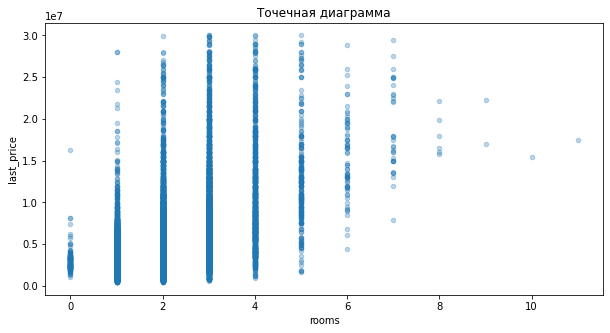

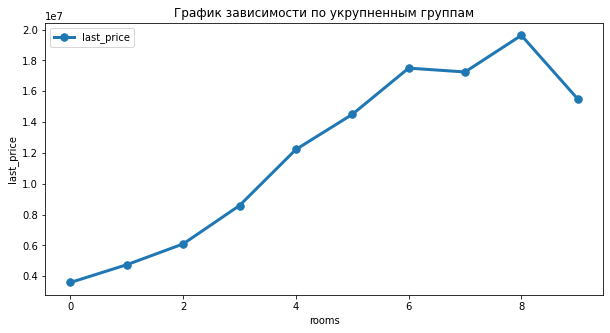

In [170]:
corr_scatter_line_price('rooms', 1)

**Вывод:**
Зависимость 0,36 еще слабее, количество комнат не так важно

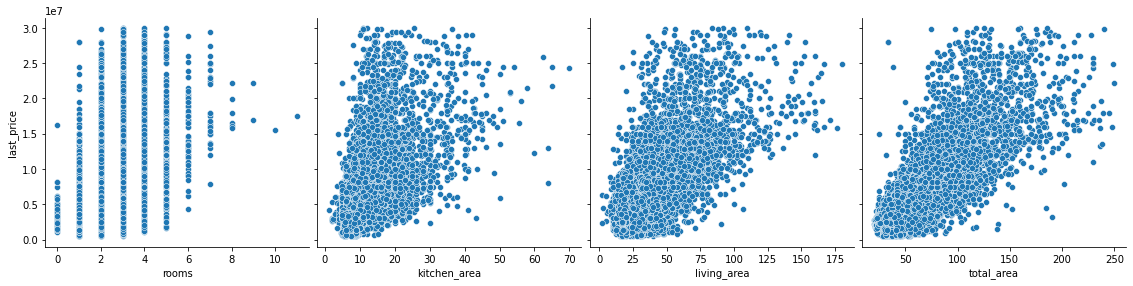

In [171]:
sns.pairplot(data,
             x_vars=["rooms", "kitchen_area", "living_area", "total_area"],
             y_vars=["last_price"],
             height=4);

На диаграммах, значения общей площади `total_area`  более плотно сгруппированы, в сравнении с остальными

                 rooms  kitchen_area  living_area  total_area  last_price
rooms         1.000000      0.193686     0.876284    0.796963    0.509538
kitchen_area  0.193686      1.000000     0.324219    0.555060    0.600957
living_area   0.876284      0.324219     1.000000    0.928553    0.681517
total_area    0.796963      0.555060     0.928553    1.000000    0.787979
last_price    0.509538      0.600957     0.681517    0.787979    1.000000


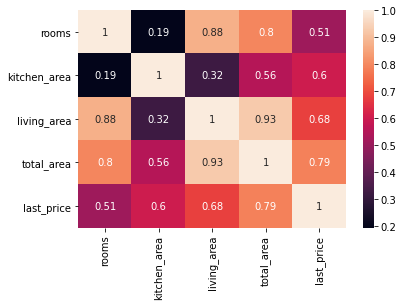

In [172]:
corr_matrix = data.loc[:,["rooms", "kitchen_area", "living_area", "total_area", "last_price"]].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True);

Сильная корреляция: 
- total_area и living_area - 0,93
- living_area и rooms - 0,88
- total_area и last_price - 0,79

Самая слабая:
- rooms и kitchen_area - 0,19

#### Тип этажа

In [173]:
floor_type_price = data.pivot_table(
                                          index='floor_type', 
                                          values='last_price', 
                                          aggfunc='median'
                                          )
floor_type_price

,last_price
floor_type,
другой,4800000.0
первый,3900000.0
последний,4250000.0


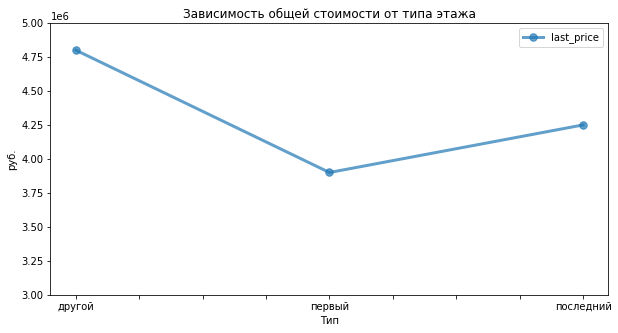

In [174]:
floor_type_price.plot(kind="line", 
                       figsize = (10, 5), 
                       alpha=0.7, 
                       style='.-', 
                       linewidth=3, 
                       markersize=15, 
                       ylim=(3000000, 5000000))

plt.title("Зависимость общей стоимости от типа этажа")
plt.ylabel("руб.")
plt.xlabel("Тип");

**Вывод:**
Первый и последний этаж в представленном датасете, стоят меньше чем другие этажи. При этом стоимость первого этажа ниже чем последнего.

#### День недели

In [175]:
day_of_week_price = data.pivot_table(
                                          index='day_of_week_exposition', 
                                          values='last_price', 
                                          aggfunc='median'
                                          )
day_of_week_price

,last_price
day_of_week_exposition,
0,4600000.0
1,4700000.0
2,4650000.0
3,4600000.0
4,4550000.0
5,4500000.0
6,4500000.0


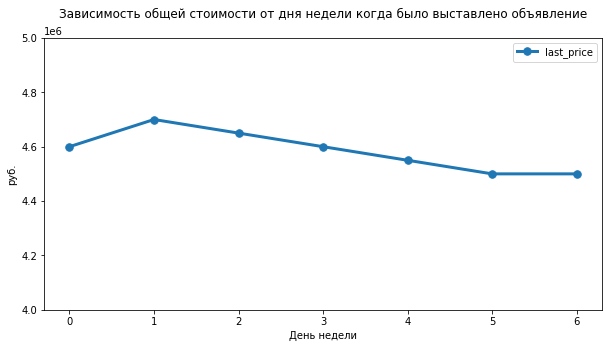

In [176]:
day_of_week_price.plot(kind="line", 
                       figsize = (10, 5), 
                       style='.-', 
                       linewidth=3, 
                       markersize=15, 
                       ylim=(4000000, 5000000))
plt.title("Зависимость общей стоимости от дня недели когда было выставлено объявление\n")
plt.ylabel("руб.")
plt.xlabel("День недели");

Цены по дням недели распределены следующим образом: самая высокая цена в объявлениях выложенных во вторник.
Понедельник, среда, четверг примерно на одно уровне.
Я пятницы цена начинает снижается до минимального уровня субботы и воскресенья. 

####  Месяц

In [177]:
month_price = data.pivot_table(
                                          index='month_exposition', 
                                          values='last_price', 
                                          aggfunc='median'
                                          )
month_price

,last_price
month_exposition,
1,4600000.0
2,4600000.0
3,4600000.0
4,4767967.5
5,4500000.0
6,4390000.0
7,4600000.0
8,4550000.0
9,4650000.0


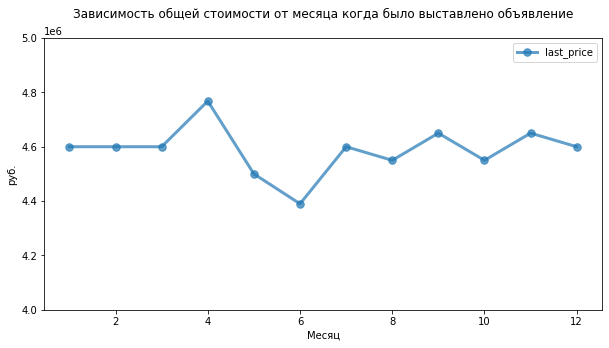

In [178]:
month_price.plot(kind="line", 
                 figsize=(10, 5), 
                 alpha=0.7, 
                 style='.-', 
                 linewidth=3, 
                 markersize=15, 
                 ylim=(4000000, 5000000))
plt.title("Зависимость общей стоимости от месяца когда было выставлено объявление\n")
plt.ylabel("руб.")
plt.xlabel("Месяц");

По месяцам медианная цена весь год примерно равна 4650000. Максимум приходится на апрель 4800000. Минимум цен: май и июнь 4500000 и 4400000.

####  Год

In [179]:
year_price = data.pivot_table(
                                          index='year_exposition', 
                                          values='last_price', 
                                          aggfunc='median'
                                          )
year_price

,last_price
year_exposition,
2014,6445000.0
2015,5200000.0
2016,4500000.0
2017,4500000.0
2018,4550000.0
2019,5000000.0


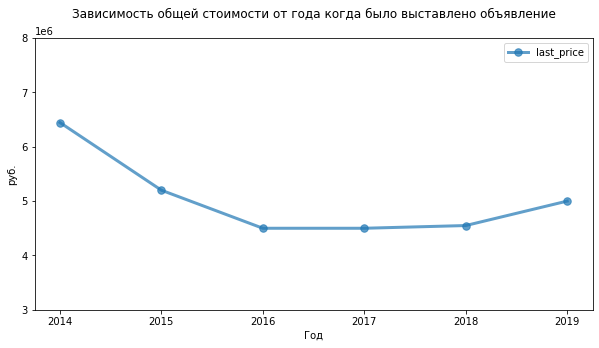

In [180]:
year_price.plot(kind="line", 
                figsize=(10, 5), 
                alpha=0.7, 
                style='.-', 
                linewidth=3, 
                markersize=15, 
                ylim=(3000000, 8000000))
plt.title("Зависимость общей стоимости от года когда было выставлено объявление\n")
plt.ylabel("руб.")
plt.xlabel("Год");

Резкое падение стоимости с 2014 по 2015. Проверим на стоимости м2

In [181]:
one_meter_price_year = data.pivot_table(
                                          index='year_exposition', 
                                          values='one_meter_price', 
                                          aggfunc='median'
                                          )

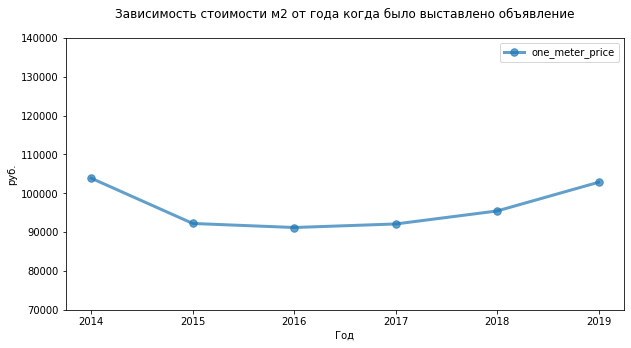

In [182]:
one_meter_price_year.plot(kind="line", 
                figsize=(10, 5), 
                alpha=0.7, 
                style='.-', 
                linewidth=3, 
                markersize=15, 
                ylim=(70000, 140000))
plt.title("Зависимость стоимости м2 от года когда было выставлено объявление\n")
plt.ylabel("руб.")
plt.xlabel("Год");

**Вывод**
Видим резкое снижение цен после пика в 2014 году,
2015-2016 падение замедлилось.
2016-2017-2018 некоторое "плато" - цена остановилась,
и с 2018 по 2019 цена растет.

Данные за 2014 год не показательны, так как в данных у нас всего один полный месяц за 2014 год.
Но есть гипотеза о том, что после резкого падения курса рубля к доллару в 2014 году и как следствие резкий рост стоимости жилья как защитного актива, после некоторого снижения цены стабильно растут.

Для установления сезонности в колебаниях цен желательно получить данные за более длительный период

**Факторы которые больше всего влияют на общую (полную) стоимость объекта:**
Из параметров самого объекта недвижимости влияет как и ожидается общая площадь квартиры, и этаж предпочтительнее не первый и не последний. 


### Населённые пункты с наибольшим числом объявлений и с самой высокой и низкой стоимостью квадратного метра

In [183]:
max_one_meter_price_by_quantity = data.pivot_table(
                                                   index='clean_locality_name', 
                                                   values='one_meter_price', 
                                                   aggfunc=('count', 'mean')
                                                   )\
                                                   .sort_values('count', ascending=False).reset_index().head(10)
max_one_meter_price_by_quantity

,clean_locality_name,count,mean
0,Санкт-Петербург,15305,110434.067752
1,Мурино,589,86085.113938
2,Кудрово,471,95336.236129
3,Шушары,439,78655.592167
4,Всеволожск,395,68633.016188
5,Пушкин,364,103012.521593
6,Колпино,337,75333.295801
7,Парголово,327,90175.913458
8,Гатчина,307,68746.146763
9,Выборг,237,58141.909153


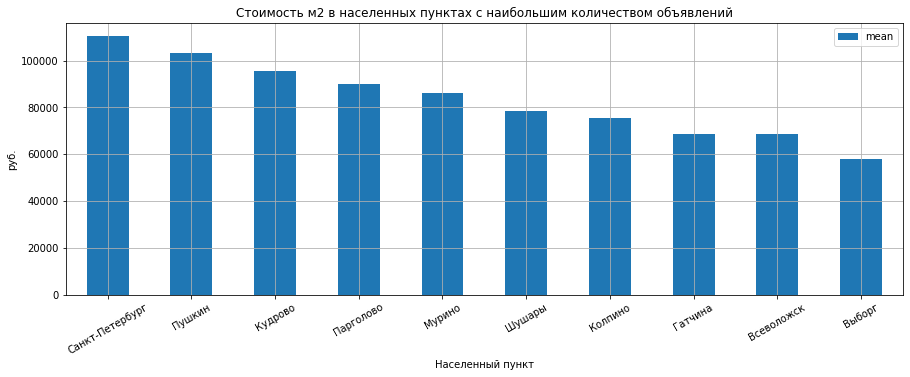

In [184]:
max_one_meter_price_by_quantity.sort_values('mean', ascending=False).plot(
                                                                         x='clean_locality_name', 
                                                                         y='mean', 
                                                                         kind='bar', 
                                                                         grid=True, 
                                                                         figsize=(15, 5)
                                                                         );

plt.xticks(rotation=30)
plt.title("Стоимость м2 в населенных пунктах с наибольшим количеством объявлений")
plt.ylabel("руб.")
plt.xlabel("Населенный пункт");

Населенный пункт с самой низкой стоимостью м2

In [185]:
max_one_meter_price_by_quantity.query('mean == mean.min()')

,clean_locality_name,count,mean
9,Выборг,237,58141.909153


Населенный пункт с самой высокой стоимостью м2

In [186]:
max_one_meter_price_by_quantity.query('mean == mean.max()')

,clean_locality_name,count,mean
0,Санкт-Петербург,15305,110434.067752


### Квартиры в Санкт-Петербурге средняя цена каждого километра удаления от центра

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='one_meter_price'>

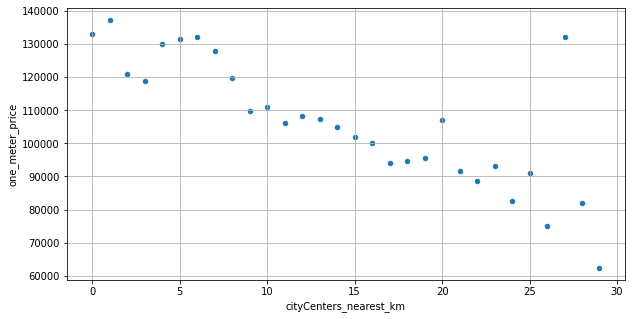

In [187]:
price_for_km = data.query('clean_locality_name == "Санкт-Петербург"')\
                                                       .pivot_table(
                                                                    index='cityCenters_nearest_km', 
                                                                    values='one_meter_price', 
                                                                    aggfunc='mean'
                                                                    ).reset_index()

price_for_km.plot(
                  x='cityCenters_nearest_km', 
                  y='one_meter_price', 
                  kind='scatter', 
                  figsize = (10, 5),
                  grid=True,
                  )

In [188]:
price_for_km

,cityCenters_nearest_km,one_meter_price
0,0,132860.961234
1,1,137074.985309
2,2,121047.685706
3,3,118697.975411
4,4,129930.963379
5,5,131325.562803
6,6,132135.708363
7,7,127927.597219
8,8,119725.721474
9,9,109790.743291


In [189]:
(price_for_km.iloc[0]['one_meter_price'] - price_for_km.iloc[29]['one_meter_price']) / len(price_for_km)

2345.951900208204

На каждый километр удаления от центра стоимость квадратного метра снижается на 2350

**Вывод**
Общая тенденция: чем дальше от центра тем цена ниже.
Есть значения выпадающие из нее, появившиеся вероятно из-за зон с элитной застройкой, с более высокой ценой за м2.
Судя по стоимости за м2, то довольно резкое падение проиходит на удалении 8..9 км, возможно здесь как раз можно провести виртуальную границу центра города.

### Общий вывод

Нами проведено исследование архива объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктов. 

На этапе изучения данных, были обнаружены столбцы с недостающими значениями, предварительно определены столбцы с аномалиями, обнаружены некорректный тип данных.

При предобработке исправили ошибки ввода пользователей для высоты помещений, определены и устранены аномальные значения в количестве комнат и этажей в здании, размерах помещений, выделено название населенного пункта в отдельный столбец для удобства группировки. Как наиболее важные для качественных результатов, проанализированы параметры цены, площади, числа комнат, длительности продажи и устранены обнаруженные аномалии. Преобразован столбец с датой.

Добавлены следующие столбцы которые могут являтся более удобным признаком для дальнейшей работы с данными:
цена одного квадратного метра; 
день недели публикации объявления; 
месяц публикации объявления; 
год публикации объявления; 
тип этажа квартиры «первый», «последний», «другой»; 
расстояние до центра города в километрах

Исследованы основные параметры объектов, обнаружено, что предположительно из-за влияния строительных размеров типовой многоэтажной застройки происходит группировка "вокруг" типовых значений: этажности, высот потолков, общей площади и жилой площади. 

Результаты исследования архива объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктов следующие:
- Половина всех объектов была продана до 100 дней после подачи объявления, после этого срока вероятность продажи резко начинает снижаться.
- На стоимость недвижимости ожидаемо влияет общая площадь объекта, этаж на котором расположена - больше ценится не первый и не последние этажи, а также период в который осуществляется продажа (скорее положение в экономике на момент продажи или например средняя ставка по ипотеке)
- Стоимость квадратного метра по населенным пунктам также ожидаемо расположилась по удалению от Санкт-Петербург. Максимальная стоимость в Санкт-Петербурге, минимальная в Выборге
- Каждый километр удаления от центра стоит квадратному метру недвижимости потери стоимости в среднем на 2800


В данных встречается множество пропусков которые могли повлиять на качество данного исследования, например отсутствие геоданных удаления от парков.

Для проверки на дубликаты, если пользователь снимает и корректирует данные в объекте недвижимости, нехватает ID.

Название населенного пункта скорее всего влияет на геоданные, и его наличие критически важно для получения качественных результатов.